In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation, Input, Bidirectional,SimpleRNN, Embedding, Conv1D, LSTM, MaxPooling1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split



from nltk.stem import PorterStemmer
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)


2024-02-07 15:57:04.515054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hsibitenda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/hsibitenda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2.12.0


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
import torch

print(torch.cuda.is_available())

if torch.cuda.is_available():
    print("Cuda is Availabe")
else:
    print("Cuda Can't be found")

True
Cuda is Availabe


In [3]:
#new_df=pd.read_csv('C:/Users/Administrator/OneDrive/Documents/africa/data/socialcons_all_new.csv')
new_df=pd.read_csv('/home/hsibitenda/scratch/harriet/socialcons_all_new.csv')
# new_df=pd.read_csv('D:/senego/dataafrica/analysis/socialcons_all_new.csv')
# new_df=pd.read_csv("C:/Users/Administrator/Downloads/bert.csv")

In [4]:
new_df.shape

(56189, 22)

In [5]:
# !pip install accelerate -U

df=new_df.copy()
df=df.astype(str)

In [6]:
df.shape

(56189, 22)

In [7]:
df.rename(columns={'Bert_label':'cluster','Name_x': 'topic','Keysector':'theme','Predicted_Labels':'sentiment', 'Entity_Categories':'category' },inplace=True)
# df.columns
df.columns

Index(['Unnamed: 0', 'textid', 'alltext', 'Date', 'Views', 'sourcetype',
       'Text_lemma', 'cluster', 'topic', 'Top_n_words', 'theme',
       'Aspect_Terms', 'Opinion_Words', 'Emotion', 'sentiment', 'Entities',
       'Relations', 'Head', 'Relation_Type', 'Tail', 'Spans', 'category'],
      dtype='object')

In [8]:
df2=df.head(50)
df2.columns

Index(['Unnamed: 0', 'textid', 'alltext', 'Date', 'Views', 'sourcetype',
       'Text_lemma', 'cluster', 'topic', 'Top_n_words', 'theme',
       'Aspect_Terms', 'Opinion_Words', 'Emotion', 'sentiment', 'Entities',
       'Relations', 'Head', 'Relation_Type', 'Tail', 'Spans', 'category'],
      dtype='object')

In [9]:
df2.head()

Unnamed: 0 textid                                            alltext  \
0         24    605  @Nj23121 @JohnSimpsonNews But the vast majorit...   
1         26    605  @Nj23121 @JohnSimpsonNews But the vast majorit...   
2         59   1619  Congratulations to Study UK Alumni Award Socia...   
3         60   1619  Congratulations to Study UK Alumni Award Socia...   
4         61   1619  Congratulations to Study UK Alumni Award Socia...   

                        Date Views sourcetype  \
0  2019-07-28 00:00:00+00:00     1    twitter   
1  2019-07-28 00:00:00+00:00     1    twitter   
2  2019-04-08 00:00:00+00:00     8    twitter   
3  2019-04-08 00:00:00+00:00     8    twitter   
4  2019-04-08 00:00:00+00:00     8    twitter   

                                          Text_lemma  \
0  vast majority need dirt poor  problem even sub...   
1  vast majority need dirt poor  problem even sub...   
2  congratulation study uk alumnus award  impact ...   
3  congratulation study uk alumnus award  impact ...   
4  congratulation study uk alumnus award  impact ...   

                                             cluster  \
0  work__government__country__south__visa__people...   
1  work__government__country__south__visa__people...   
2  work__government__country__south__visa__people...   
3  work__government__country__south__visa__people...   
4  work__government__country__south__visa__people...   

                                    topic  \
0            -1_people_country_also_trade   
1            -1_people_country_also_trade   
2  4_youth_challenge_amp_africatrademarks   
3  4_youth_challenge_amp_africatrademarks   
4  4_youth_challenge_amp_africatrademarks   

                                         Top_n_words  ...  \
0  people - country - also - trade - world - many...  ...   
1  people - country - also - trade - world - many...  ...   
2  youth - challenge - amp - africatrademarks - y...  ...   
3  youth - challenge - amp - africatrademarks - y...  ...   
4  youth - challenge - amp - africatrademarks - y...  ...   

                                       Opinion_Words   Emotion sentiment  \
0  vast poor even absolute dysfunctional economic...  negative  negative   
1  vast poor even absolute dysfunctional economic...  negative  negative   
2                                rural inspirational  positive  positive   
3                                rural inspirational  positive  positive   
4                                rural inspirational  positive  positive   

                                            Entities  \
0  dict_items([('subcontinent', {'url': 'https://...   
1  dict_items([('subcontinent', {'url': 'https://...   
2  dict_items([('rcopyrightjane woodroffe', {'url...   
3  dict_items([('rcopyrightjane woodroffe', {'url...   
4  dict_items([('rcopyrightjane woodroffe', {'url...   

                                           Relations  \
0  [{'head': 'subcontinent', 'type': 'has part', ...   
1  [{'head': 'subcontinent', 'type': 'has part', ...   
2  [{'head': 'rcopyrightjane woodroffe', 'type': ...   
3  [{'head': 'rcopyrightjane woodroffe', 'type': ...   
4  [{'head': 'rcopyrightjane woodroffe', 'type': ...   

                       Head Relation_Type                 Tail       Spans  \
0              subcontinent      has part                china  [[0, 128]]   
1                     china       part of         subcontinent  [[0, 128]]   
2  rcopyrightjane woodroffe      employer  bulungula incubator  [[0, 128]]   
3  rcopyrightjane woodroffe     residence            bulungula  [[0, 128]]   
4  rcopyrightjane woodroffe      employer            bulungula  [[0, 128]]   

        category  
0  ['locations']  
1  ['locations']  
2    ['persons']  
3    ['persons']  
4    ['persons']  

[5 rows x 22 columns]

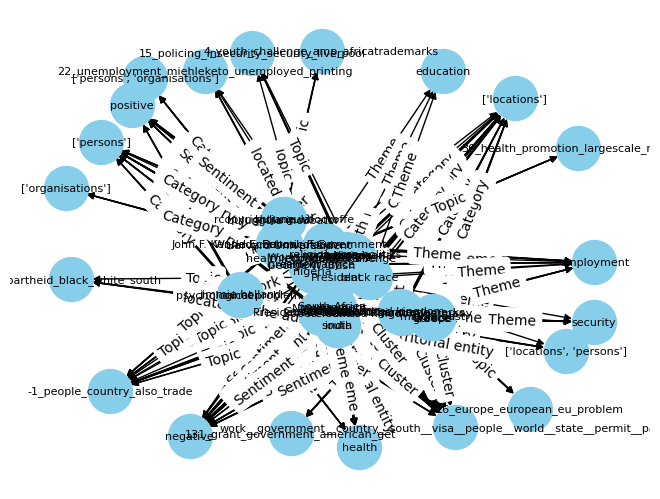

In [10]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df2[['topic', 'theme', 'cluster', 'Head', 'Tail','sentiment', 'Relations', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]  # Corrected entities extraction

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(theme, type='Theme')
    G.add_node(category, type='Category')
    G.add_node(cluster, type='Cluster')

    for entity in entities:
        G.add_node(entity, type='Entity')

    # Add edges from Relations
    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type)

        # Add additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='Sentiment')
        G.add_edge(head, theme, type='Theme')
        G.add_edge(head, category, type='Category')
        G.add_edge(head, cluster, type='Cluster')
        G.add_edge(head, topic, type='Topic')

        G.add_edge(tail, sentiment, type='Sentiment')
        G.add_edge(tail, theme, type='Theme')
        G.add_edge(tail, category, type='Category')
        G.add_edge(tail, cluster, type='Cluster')
        G.add_edge(tail, topic, type='Topic')

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [11]:
df2.columns

Index(['Unnamed: 0', 'textid', 'alltext', 'Date', 'Views', 'sourcetype',
       'Text_lemma', 'cluster', 'topic', 'Top_n_words', 'theme',
       'Aspect_Terms', 'Opinion_Words', 'Emotion', 'sentiment', 'Entities',
       'Relations', 'Head', 'Relation_Type', 'Tail', 'Spans', 'category'],
      dtype='object')

In [12]:
df['Date']

0        2019-07-28 00:00:00+00:00
1        2019-07-28 00:00:00+00:00
2        2019-04-08 00:00:00+00:00
3        2019-04-08 00:00:00+00:00
4        2019-04-08 00:00:00+00:00
                   ...            
56184                          nan
56185    2021-05-31 00:00:00+00:00
56186    2021-05-31 00:00:00+00:00
56187    2021-05-31 00:00:00+00:00
56188    2021-05-31 00:00:00+00:00
Name: Date, Length: 56189, dtype: object

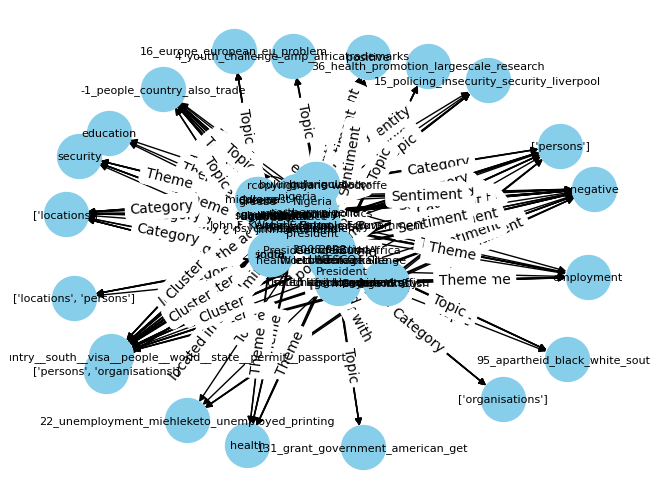

In [13]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df2[['topic','Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]  # Corrected entities extraction
    time = row['Date']  # Assuming there is a 'time' column in your DataFrame

    # Add nodes with time information
    G.add_node(topic, type='Topic', time=time)
    G.add_node(sentiment, type='Sentiment', time=time)
    G.add_node(theme, type='Theme', time=time)
    G.add_node(category, type='Category', time=time)
    G.add_node(cluster, type='Cluster', time=time)

    for entity in entities:
        G.add_node(entity, type='Entity', time=time)

    # Add edges from Relations with time information
    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type, time=time)

        # Add additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='Sentiment', time=time)
        G.add_edge(head, theme, type='Theme', time=time)
        G.add_edge(head, category, type='Category', time=time)
        G.add_edge(head, cluster, type='Cluster', time=time)
        G.add_edge(head, topic, type='Topic', time=time)

        G.add_edge(tail, sentiment, type='Sentiment', time=time)
        G.add_edge(tail, theme, type='Theme', time=time)
        G.add_edge(tail, category, type='Category', time=time)
        G.add_edge(tail, cluster, type='Cluster', time=time)
        G.add_edge(tail, topic, type='Topic', time=time)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [14]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_3.gexf")


In [15]:
import ast
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F


# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df2[['topic','Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]  # Corrected entities extraction
    time = row['Date']  # Assuming there is a 'time' column in your DataFrame

    # Add nodes with time information
    G.add_node(topic, type='Topic', time=time)
    G.add_node(sentiment, type='Sentiment', time=time)
    G.add_node(theme, type='Theme', time=time)
    G.add_node(category, type='Category', time=time)
    G.add_node(cluster, type='Cluster', time=time)

    for entity in entities:
        G.add_node(entity, type='Entity', time=time)

    # Add edges from Relations with time information
    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type, time=time)

        # Add additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='Sentiment', time=time)
        G.add_edge(head, theme, type='Theme', time=time)
        G.add_edge(head, category, type='Category', time=time)
        G.add_edge(head, cluster, type='Cluster', time=time)
        G.add_edge(head, topic, type='Topic', time=time)

        G.add_edge(tail, sentiment, type='Sentiment', time=time)
        G.add_edge(tail, theme, type='Theme', time=time)
        G.add_edge(tail, category, type='Category', time=time)
        G.add_edge(tail, cluster, type='Cluster', time=time)
        G.add_edge(tail, topic, type='Topic', time=time)

# Convert to PyTorch Geometric Data
edge_list = nx.to_pandas_edgelist(G)

# Check data types and convert to numeric if needed
if edge_list['source'].dtype == 'O':
    edge_list['source'] = pd.factorize(edge_list['source'])[0]

if edge_list['target'].dtype == 'O':
    edge_list['target'] = pd.factorize(edge_list['target'])[0]

# Create PyTorch Geometric Data object
edge_index = torch.tensor(edge_list[['source', 'target']].values, dtype=torch.long).t().contiguous()
x = torch.eye(len(G.nodes))  # Replace with your actual features

# Generate random train/test split (80% train, 20% test)
num_nodes = len(G.nodes)
train_mask = torch.randperm(num_nodes) < 0.8
test_mask = ~train_mask

# Assign labels randomly for demonstration purposes
y = torch.randint(0, 2, (num_nodes,), dtype=torch.long)

# Create PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, train_mask=train_mask, test_mask=test_mask, y=y)

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(data.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, y.max().item() + 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x


# Create the model
model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

# Define the training and testing functions
def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)  # Use the class with the highest probability.
    test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Calculate the ratio of correct predictions.
    return test_acc

# Training loop
for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# Test the model
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

# Visualize the embeddings
def visualize(embeddings, color):
    # Your visualization code here
    pass

model.eval()
out = model(data.x, data.edge_index)
visualize(out, color=data.y)


Epoch: 001, Loss: 0.8112
Epoch: 002, Loss: 0.7307
Epoch: 003, Loss: 0.6353
Epoch: 004, Loss: 0.7056
Epoch: 005, Loss: 0.5382
Epoch: 006, Loss: 0.5272
Epoch: 007, Loss: 0.5713
Epoch: 008, Loss: 0.6184
Epoch: 009, Loss: 0.4421
Epoch: 010, Loss: 0.4309
Epoch: 011, Loss: 0.4579
Epoch: 012, Loss: 0.4342
Epoch: 013, Loss: 0.3735
Epoch: 014, Loss: 0.4962
Epoch: 015, Loss: 0.2500
Epoch: 016, Loss: 0.2927
Epoch: 017, Loss: 0.2024
Epoch: 018, Loss: 0.4134
Epoch: 019, Loss: 0.3416
Epoch: 020, Loss: 0.1768
Epoch: 021, Loss: 0.2053
Epoch: 022, Loss: 0.1471
Epoch: 023, Loss: 0.3371
Epoch: 024, Loss: 0.0889
Epoch: 025, Loss: 0.1165
Epoch: 026, Loss: 0.3180
Epoch: 027, Loss: 0.3064
Epoch: 028, Loss: 0.1882
Epoch: 029, Loss: 0.2226
Epoch: 030, Loss: 0.0499
Epoch: 031, Loss: 0.0911
Epoch: 032, Loss: 0.0341
Epoch: 033, Loss: 0.0429
Epoch: 034, Loss: 0.3058
Epoch: 035, Loss: 0.1052
Epoch: 036, Loss: 0.0801
Epoch: 037, Loss: 0.0485
Epoch: 038, Loss: 0.0334
Epoch: 039, Loss: 0.0609
Epoch: 040, Loss: 0.0732


In [16]:
df.shape

(56189, 22)

In [17]:
import ast
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F


# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df[['topic','Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]  # Corrected entities extraction
    time = row['Date']  # Assuming there is a 'time' column in your DataFrame

    # Add nodes with time information
    G.add_node(topic, type='Topic', time=time)
    G.add_node(sentiment, type='Sentiment', time=time)
    G.add_node(theme, type='Theme', time=time)
    G.add_node(category, type='Category', time=time)
    G.add_node(cluster, type='Cluster', time=time)

    for entity in entities:
        G.add_node(entity, type='Entity', time=time)

    # Add edges from Relations with time information
    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type, time=time)

        # Add additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='Sentiment', time=time)
        G.add_edge(head, theme, type='Theme', time=time)
        G.add_edge(head, category, type='Category', time=time)
        G.add_edge(head, cluster, type='Cluster', time=time)
        G.add_edge(head, topic, type='Topic', time=time)

        G.add_edge(tail, sentiment, type='Sentiment', time=time)
        G.add_edge(tail, theme, type='Theme', time=time)
        G.add_edge(tail, category, type='Category', time=time)
        G.add_edge(tail, cluster, type='Cluster', time=time)
        G.add_edge(tail, topic, type='Topic', time=time)

# Convert to PyTorch Geometric Data
edge_list = nx.to_pandas_edgelist(G)

# Check data types and convert to numeric if needed
if edge_list['source'].dtype == 'O':
    edge_list['source'] = pd.factorize(edge_list['source'])[0]

if edge_list['target'].dtype == 'O':
    edge_list['target'] = pd.factorize(edge_list['target'])[0]

# Create PyTorch Geometric Data object
edge_index = torch.tensor(edge_list[['source', 'target']].values, dtype=torch.long).t().contiguous()
x = torch.eye(len(G.nodes))  # Replace with your actual features

# Generate random train/test split (80% train, 20% test)
num_nodes = len(G.nodes)
train_mask = torch.randperm(num_nodes) < 0.8
test_mask = ~train_mask

# Assign labels randomly for demonstration purposes
y = torch.randint(0, 2, (num_nodes,), dtype=torch.long)

# Create PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, train_mask=train_mask, test_mask=test_mask, y=y)

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(data.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, y.max().item() + 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x


# Create the model
model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

# Define the training and testing functions
def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)  # Use the class with the highest probability.
    test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Calculate the ratio of correct predictions.
    return test_acc

# Training loop
for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# Test the model
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

# Visualize the embeddings
def visualize(embeddings, color):
    # Your visualization code here
    pass

model.eval()
out = model(data.x, data.edge_index)
visualize(out, color=data.y)


Epoch: 001, Loss: 0.6816
Epoch: 002, Loss: 0.6364
Epoch: 003, Loss: 0.5972
Epoch: 004, Loss: 0.5170
Epoch: 005, Loss: 0.4151
Epoch: 006, Loss: 0.4308
Epoch: 007, Loss: 0.3426
Epoch: 008, Loss: 0.2371
Epoch: 009, Loss: 0.1754
Epoch: 010, Loss: 0.1707
Epoch: 011, Loss: 0.1560
Epoch: 012, Loss: 0.1510
Epoch: 013, Loss: 0.1182
Epoch: 014, Loss: 0.0856
Epoch: 015, Loss: 0.0593
Epoch: 016, Loss: 0.0307
Epoch: 017, Loss: 0.0414
Epoch: 018, Loss: 0.0202
Epoch: 019, Loss: 0.0283
Epoch: 020, Loss: 0.0171
Epoch: 021, Loss: 0.0142
Epoch: 022, Loss: 0.0094
Epoch: 023, Loss: 0.0038
Epoch: 024, Loss: 0.0055
Epoch: 025, Loss: 0.0122
Epoch: 026, Loss: 0.0042
Epoch: 027, Loss: 0.0024
Epoch: 028, Loss: 0.0063
Epoch: 029, Loss: 0.0042
Epoch: 030, Loss: 0.0021
Epoch: 031, Loss: 0.0074
Epoch: 032, Loss: 0.0027
Epoch: 033, Loss: 0.0018
Epoch: 034, Loss: 0.0016
Epoch: 035, Loss: 0.0047
Epoch: 036, Loss: 0.0019
Epoch: 037, Loss: 0.0025
Epoch: 038, Loss: 0.0015
Epoch: 039, Loss: 0.0055
Epoch: 040, Loss: 0.0052


In [18]:
import ast
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F


# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df2[['topic','Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]  # Corrected entities extraction
    time = row['Date']  # Assuming there is a 'time' column in your DataFrame

    # Add nodes with time information
    G.add_node(topic, type='Topic', time=time)
    G.add_node(sentiment, type='Sentiment', time=time)
    G.add_node(theme, type='Theme', time=time)
    G.add_node(category, type='Category', time=time)
    G.add_node(cluster, type='Cluster', time=time)

    for entity in entities:
        G.add_node(entity, type='Entity', time=time)

    # Add edges from Relations with time information
    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type, time=time)

        # Add additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='Sentiment', time=time)
        G.add_edge(head, theme, type='Theme', time=time)
        G.add_edge(head, category, type='Category', time=time)
        G.add_edge(head, cluster, type='Cluster', time=time)
        G.add_edge(head, topic, type='Topic', time=time)

        G.add_edge(tail, sentiment, type='Sentiment', time=time)
        G.add_edge(tail, theme, type='Theme', time=time)
        G.add_edge(tail, category, type='Category', time=time)
        G.add_edge(tail, cluster, type='Cluster', time=time)
        G.add_edge(tail, topic, type='Topic', time=time)

# Convert to PyTorch Geometric Data
edge_list = nx.to_pandas_edgelist(G)

# Check data types and convert to numeric if needed
if edge_list['source'].dtype == 'O':
    edge_list['source'] = pd.factorize(edge_list['source'])[0]

if edge_list['target'].dtype == 'O':
    edge_list['target'] = pd.factorize(edge_list['target'])[0]

# Create PyTorch Geometric Data object
edge_index = torch.tensor(edge_list[['source', 'target']].values, dtype=torch.long).t().contiguous()
x = torch.eye(len(G.nodes))  # Replace with your actual features

# Generate random train/test split (80% train, 20% test)
num_nodes = len(G.nodes)
train_mask = torch.randperm(num_nodes) < 0.8
test_mask = ~train_mask

# Assign labels randomly for demonstration purposes
y = torch.randint(0, 2, (num_nodes,), dtype=torch.long)

# Create PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, train_mask=train_mask, test_mask=test_mask, y=y)

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(data.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, y.max().item() + 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x


# Create the model
model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

# Define the training and testing functions
def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)  # Use the class with the highest probability.
    test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Calculate the ratio of correct predictions.
    return test_acc

# Training loop
for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# Test the model
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

# Visualize the embeddings
def visualize(embeddings, color):
    # Your visualization code here
    pass

model.eval()
out = model(data.x, data.edge_index)
visualize(out, color=data.y)


Epoch: 001, Loss: 0.8003
Epoch: 002, Loss: 0.7062
Epoch: 003, Loss: 0.6298
Epoch: 004, Loss: 0.6143
Epoch: 005, Loss: 0.6180
Epoch: 006, Loss: 0.5278
Epoch: 007, Loss: 0.5917
Epoch: 008, Loss: 0.4710
Epoch: 009, Loss: 0.6019
Epoch: 010, Loss: 0.3166
Epoch: 011, Loss: 0.4363
Epoch: 012, Loss: 0.2762
Epoch: 013, Loss: 0.2915
Epoch: 014, Loss: 0.2801
Epoch: 015, Loss: 0.1978
Epoch: 016, Loss: 0.2615
Epoch: 017, Loss: 0.3825
Epoch: 018, Loss: 0.1756
Epoch: 019, Loss: 0.1449
Epoch: 020, Loss: 0.1050
Epoch: 021, Loss: 0.0875
Epoch: 022, Loss: 0.2513
Epoch: 023, Loss: 0.1750
Epoch: 024, Loss: 0.1222
Epoch: 025, Loss: 0.0914
Epoch: 026, Loss: 0.0964
Epoch: 027, Loss: 0.1536
Epoch: 028, Loss: 0.1277
Epoch: 029, Loss: 0.0416
Epoch: 030, Loss: 0.0312
Epoch: 031, Loss: 0.0360
Epoch: 032, Loss: 0.0977
Epoch: 033, Loss: 0.0308
Epoch: 034, Loss: 0.0451
Epoch: 035, Loss: 0.0486
Epoch: 036, Loss: 0.0438
Epoch: 037, Loss: 0.0141
Epoch: 038, Loss: 0.0462
Epoch: 039, Loss: 0.0254
Epoch: 040, Loss: 0.0283


In [ ]:
# pip install python-louvain


In [ ]:
# pip install folium


Epoch: 001, Loss: 0.6816
Epoch: 002, Loss: 0.6364
Epoch: 003, Loss: 0.5972
Epoch: 004, Loss: 0.5170
Epoch: 005, Loss: 0.4151
Epoch: 006, Loss: 0.4308
Epoch: 007, Loss: 0.3426
Epoch: 008, Loss: 0.2371
Epoch: 009, Loss: 0.1754
Epoch: 010, Loss: 0.1707
Epoch: 011, Loss: 0.1560
Epoch: 012, Loss: 0.1510
Epoch: 013, Loss: 0.1182
Epoch: 014, Loss: 0.0856
Epoch: 015, Loss: 0.0593
Epoch: 016, Loss: 0.0307
Epoch: 017, Loss: 0.0414
Epoch: 018, Loss: 0.0202
Epoch: 019, Loss: 0.0283
Epoch: 020, Loss: 0.0171
Epoch: 021, Loss: 0.0142
Epoch: 022, Loss: 0.0094
Epoch: 023, Loss: 0.0038
Epoch: 024, Loss: 0.0055
Epoch: 025, Loss: 0.0122
Epoch: 026, Loss: 0.0042
Epoch: 027, Loss: 0.0024
Epoch: 028, Loss: 0.0063
Epoch: 029, Loss: 0.0042
Epoch: 030, Loss: 0.0021
Epoch: 031, Loss: 0.0074
Epoch: 032, Loss: 0.0027
Epoch: 033, Loss: 0.0018
Epoch: 034, Loss: 0.0016
Epoch: 035, Loss: 0.0047
Epoch: 036, Loss: 0.0019
Epoch: 037, Loss: 0.0025
Epoch: 038, Loss: 0.0015
Epoch: 039, Loss: 0.0055
Epoch: 040, Loss: 0.0052


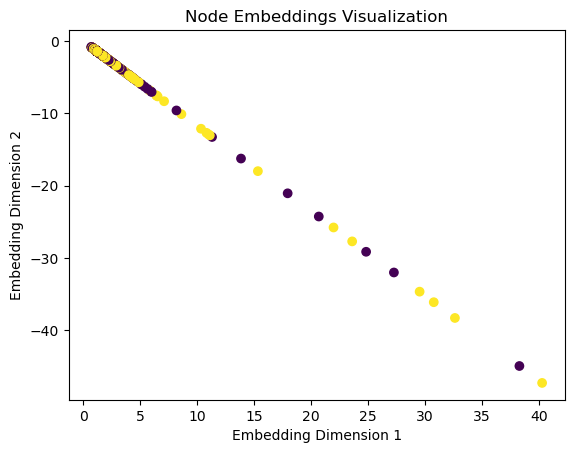

In [20]:
import ast
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F



# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df[['topic', 'Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category']]# 'Views']]

# Create a directed graph
G = nx.DiGraph()

# Create a dictionary to store 'Views' values for each node
views_dict = {}

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]  # Corrected entities extraction
    time = row['Date']  # Assuming there is a 'time' column in your DataFrame

    # Add nodes with time and views information
    G.add_node(topic, type='Topic', time=time)
    G.add_node(sentiment, type='Sentiment', time=time)
    G.add_node(theme, type='Theme', time=time)
    G.add_node(category, type='Category', time=time)
    G.add_node(cluster, type='Cluster', time=time)
    
    for entity in entities:
        G.add_node(entity, type='Entity', time=time)
        # Store 'Views' value for Head and Tail nodes
        '''views = pd.to_numeric(row['Views'], errors='coerce')  # Convert to numeric, handle errors
        if entity in views_dict:
            views_dict[entity].append(views)
        else:
            views_dict[entity] = [views]'''

    # Add edges from Relations with time and views information
    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type, time=time)

        # Add additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='Sentiment', time=time)
        G.add_edge(head, theme, type='Theme', time=time)
        G.add_edge(head, category, type='Category', time=time)
        G.add_edge(head, cluster, type='Cluster', time=time)
        G.add_edge(head, topic, type='Topic', time=time)

        G.add_edge(tail, sentiment, type='Sentiment', time=time)
        G.add_edge(tail, theme, type='Theme', time=time)
        G.add_edge(tail, category, type='Category', time=time)
        G.add_edge(tail, cluster, type='Cluster', time=time)
        G.add_edge(tail, topic, type='Topic', time=time)


# Convert to PyTorch Geometric Data
edge_list = nx.to_pandas_edgelist(G)

# Check data types and convert to numeric if needed
if edge_list['source'].dtype == 'O':
    edge_list['source'] = pd.factorize(edge_list['source'])[0]

if edge_list['target'].dtype == 'O':
    edge_list['target'] = pd.factorize(edge_list['target'])[0]

# Create PyTorch Geometric Data object
edge_index = torch.tensor(edge_list[['source', 'target']].values, dtype=torch.long).t().contiguous()
x = torch.eye(len(G.nodes))  # Replace with your actual features

# Generate random train/test split (80% train, 20% test)
num_nodes = len(G.nodes)
train_mask = torch.randperm(num_nodes) < 0.8
test_mask = ~train_mask

# Assign labels randomly for demonstration purposes
y = torch.randint(0, 2, (num_nodes,), dtype=torch.long)

# Create PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, train_mask=train_mask, test_mask=test_mask, y=y)

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(data.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, y.max().item() + 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x


# Create the model
model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

# Define the training and testing functions
def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)  # Use the class with the highest probability.
    test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Calculate the ratio of correct predictions.
    return test_acc

# Training loop
for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# Test the model
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

# Visualize the embeddings
def visualize(embeddings, color):
    """
    Visualize node embeddings using a scatter plot.
    """
    plt.scatter(embeddings[:, 0], embeddings[:, 1], c=color, cmap='viridis')
    plt.title('Node Embeddings Visualization')
    plt.xlabel('Embedding Dimension 1')
    plt.ylabel('Embedding Dimension 2')
    plt.show()

# After the training loop and testing, you can visualize the embeddings
model.eval()
out = model(data.x, data.edge_index)
visualize(out.detach().numpy(), color=data.y.numpy())



In [48]:
import ast
import networkx as nx
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import pandas as pd
import numpy as np

# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df[['topic', 'Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]  # Corrected entities extraction
    time = row['Date']  # Assuming there is a 'time' column in your DataFrame

    # Add nodes with time and views information
    G.add_node(topic, type='Topic', time=time)
    G.add_node(sentiment, type='Sentiment', time=time)
    G.add_node(theme, type='Theme', time=time)
    G.add_node(category, type='Category', time=time)
    G.add_node(cluster, type='Cluster', time=time)
    
    for entity in entities:
        G.add_node(entity, type='Entity', time=time)
        # Store 'Views' value for Head and Tail nodes
        '''views = pd.to_numeric(row['Views'], errors='coerce')  # Convert to numeric, handle errors
        if entity in views_dict:
            views_dict[entity].append(views)
        else:
            views_dict[entity] = [views]'''

    # Add edges from Relations with time and views information
    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type, time=time)

        # Add additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='Sentiment', time=time)
        G.add_edge(head, theme, type='Theme', time=time)
        G.add_edge(head, category, type='Category', time=time)
        G.add_edge(head, cluster, type='Cluster', time=time)
        G.add_edge(head, topic, type='Topic', time=time)

        G.add_edge(tail, sentiment, type='Sentiment', time=time)
        G.add_edge(tail, theme, type='Theme', time=time)
        G.add_edge(tail, category, type='Category', time=time)
        G.add_edge(tail, cluster, type='Cluster', time=time)
        G.add_edge(tail, topic, type='Topic', time=time)

# Convert edge list to pandas DataFrame
edge_list_df = nx.to_pandas_edgelist(G)

# Convert source and target columns to integers
edge_list_df['source'] = pd.factorize(edge_list_df['source'])[0]
edge_list_df['target'] = pd.factorize(edge_list_df['target'])[0]

# Extract source and target columns from the DataFrame
edges = edge_list_df[['source', 'target']].values.T

# Convert the list of edges to a PyTorch tensor
edge_index = torch.tensor(edges, dtype=torch.long)

# Generate random train/test split (80% train, 20% test)
num_nodes = len(G.nodes)
train_mask = torch.randperm(num_nodes) < 0.8
test_mask = ~train_mask

# Assign labels randomly for demonstration purposes
y = torch.randint(0, 2, (num_nodes,), dtype=torch.long)

# Create PyTorch Geometric Data object
data = Data(edge_index=edge_index, train_mask=train_mask, test_mask=test_mask, y=y)

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(data.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, y.max().item() + 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x


# Create the model
model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

# Define the training and testing functions
def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)  # Use the class with the highest probability.
    test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Calculate the ratio of correct predictions.
    return test_acc

# Training loop
for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# Test the model
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

# Visualize the embeddings
def visualize(embeddings, color):
    """
    Visualize node embeddings using a scatter plot.
    """
    plt.scatter(embeddings[:, 0], embeddings[:, 1], c=color, cmap='viridis')
    plt.title('Node Embeddings Visualization')
    plt.xlabel('Embedding Dimension 1')
    plt.ylabel('Embedding Dimension 2')
    plt.show()

# After the training loop and testing, you can visualize the embeddings
model.eval()
out = model(data.x, data.edge_index)
visualize(out.detach().numpy(), color=data.y.numpy())


AttributeError: 'NoneType' object has no attribute 'size'

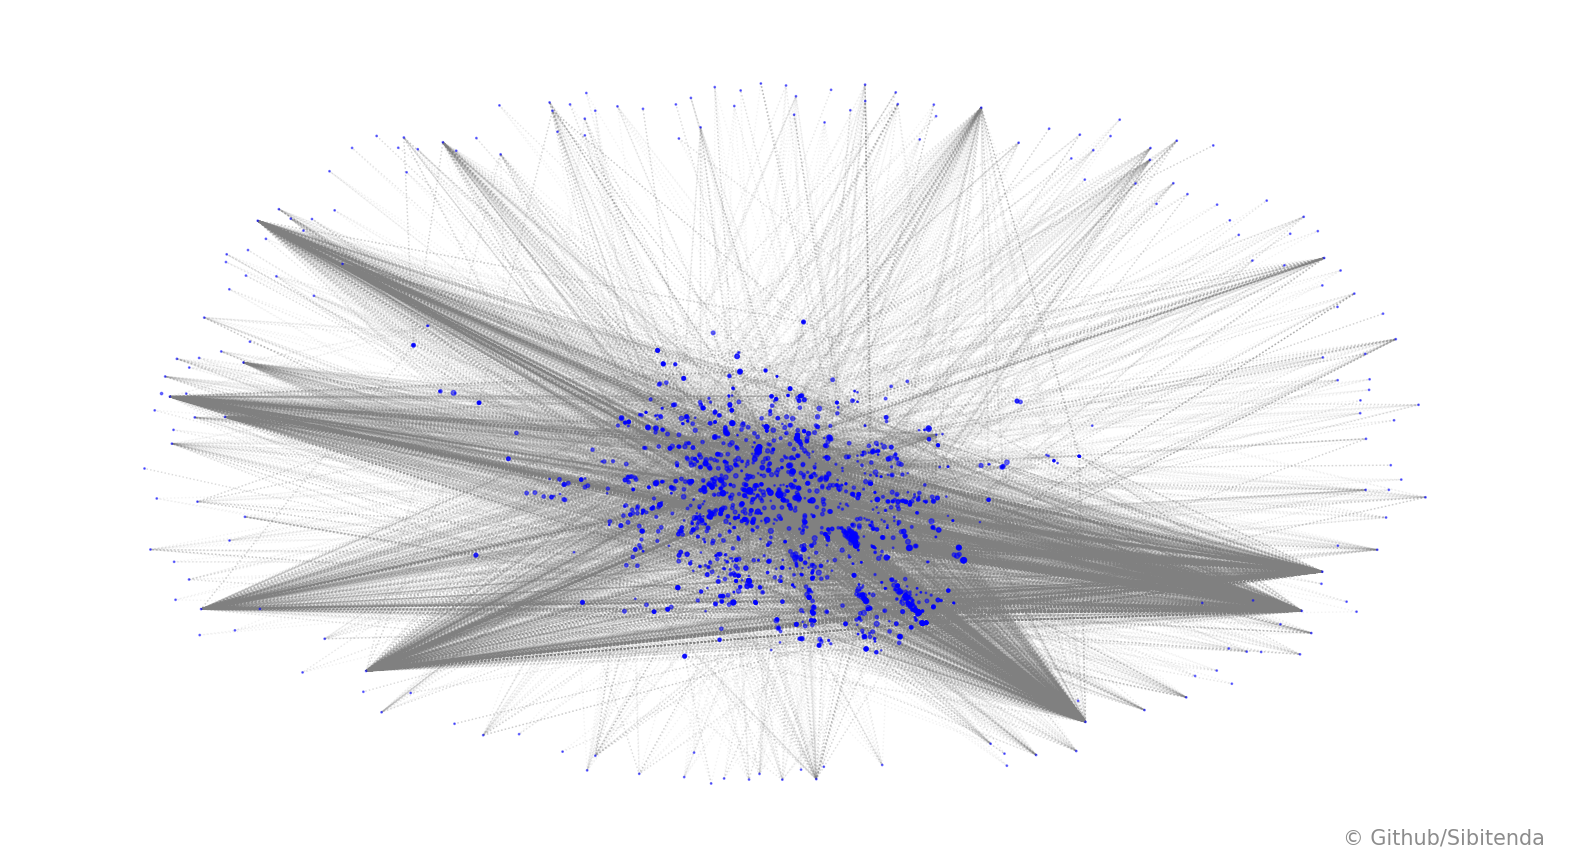

In [22]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df[['topic', 'Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category', 'Views']]

# Create a directed graph
G = nx.DiGraph()

# Create a dictionary to store 'Views' values for each node
views_dict = {}

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]  # Corrected entities extraction
    time = row['Date']  # Assuming there is a 'time' column in your DataFrame

    # Add nodes with time and views information
    G.add_node(topic, type='Topic', time=time)
    G.add_node(sentiment, type='Sentiment', time=time)
    G.add_node(theme, type='Theme', time=time)
    G.add_node(category, type='Category', time=time)
    G.add_node(cluster, type='Cluster', time=time)
    
    for entity in entities:
        G.add_node(entity, type='Entity', time=time)
        # Store 'Views' value for Head and Tail nodes
        views = pd.to_numeric(row['Views'], errors='coerce')  # Convert to numeric, handle errors
        if entity in views_dict:
            views_dict[entity].append(views)
        else:
            views_dict[entity] = [views]

    # Add edges from Relations with time and views information
    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type, time=time)

        # Add additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='Sentiment', time=time)
        G.add_edge(head, theme, type='Theme', time=time)
        G.add_edge(head, category, type='Category', time=time)
        G.add_edge(head, cluster, type='Cluster', time=time)
        G.add_edge(head, topic, type='Topic', time=time)

        G.add_edge(tail, sentiment, type='Sentiment', time=time)
        G.add_edge(tail, theme, type='Theme', time=time)
        G.add_edge(tail, category, type='Category', time=time)
        G.add_edge(tail, cluster, type='Cluster', time=time)
        G.add_edge(tail, topic, type='Topic', time=time)

# Save the graph in GEXF file format
nx.write_gexf(G, 'graphgcn2.gexf')

# Compute layout for plotting
pos = nx.spring_layout(G)

# Convert node sizes to Python float
node_sizes = [float(np.log1p(sum(views_dict[node]) / len(views_dict[node]))) if node in views_dict and views_dict[node] else 1 for node in G.nodes]

# Figure
fig, ax = plt.subplots(figsize=(20, 11))

# Map "pos" attribute to nodes from pos dict
for node, position in pos.items():
    G.nodes[node]['pos'] = position

# Draw nodes
nx.draw_networkx_nodes(G=G, pos=nx.get_node_attributes(G, 'pos'), node_color='blue', alpha=0.5,
                       node_size=node_sizes)

# Draw edges
nx.draw_networkx_edges(G=G, pos=nx.get_node_attributes(G, 'pos'), edge_color='grey', style="dotted", alpha=0.1,
                       arrows=False)

ax.axis('off')

# Watermark
ax.text(0.99, 0.01, '© Github/Sibitenda',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='grey',
        fontsize=15,
        alpha=0.9)

# Show the plot
plt.show()


In [38]:
df2=df.head(5)

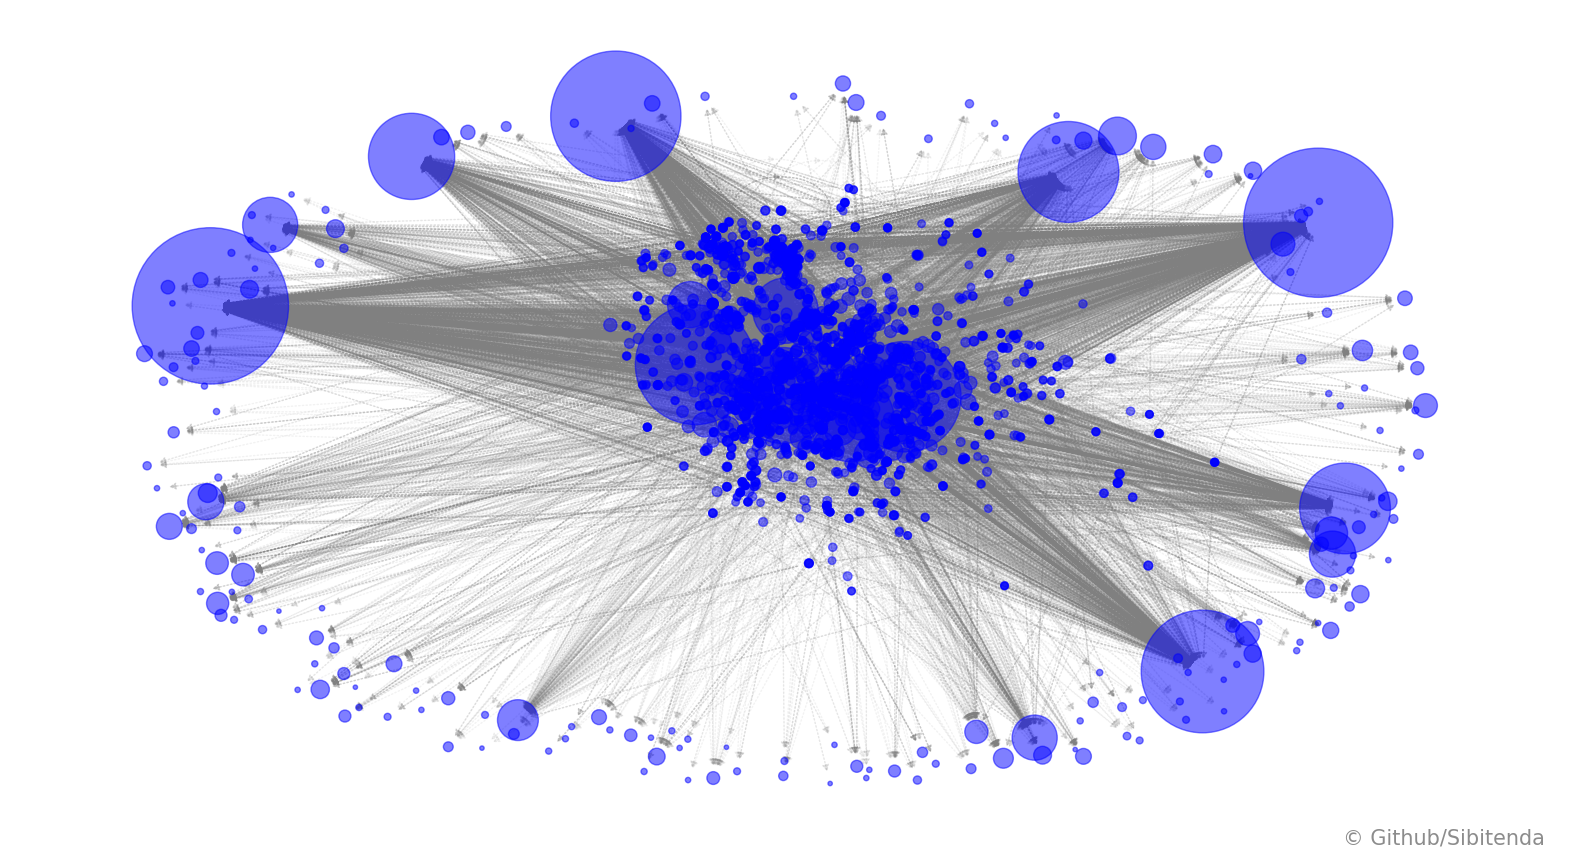

In [32]:
import ast
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Import pandas for data manipulation

# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df[['topic', 'Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category', 'Views']]

# Create a directed graph
G = nx.DiGraph()

# Create a dictionary to store 'Views' values for each node
views_dict = {}

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]  # Corrected entities extraction
    time = row['Date']  # Assuming there is a 'time' column in your DataFrame

    # Add nodes with time information
    G.add_node(topic, type='Topic', time=time)
    G.add_node(sentiment, type='Sentiment', time=time)
    G.add_node(theme, type='Theme', time=time)
    G.add_node(category, type='Category', time=time)
    G.add_node(cluster, type='Cluster', time=time)
    
    for entity in entities:
        G.add_node(entity, type='Entity', time=time)
        # Store 'Views' value for Head and Tail nodes
        views = pd.to_numeric(row['Views'], errors='coerce')  # Convert to numeric, handle errors
        if entity in views_dict:
            views_dict[entity].append(views)
        else:
            views_dict[entity] = [views]

    # Add edges from Relations with time and views information
    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type, time=time)

        # Add additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='Sentiment', time=time)
        G.add_edge(head, theme, type='Theme', time=time)
        G.add_edge(head, category, type='Category', time=time)
        G.add_edge(head, cluster, type='Cluster', time=time)
        G.add_edge(head, topic, type='Topic', time=time)

        G.add_edge(tail, sentiment, type='Sentiment', time=time)
        G.add_edge(tail, theme, type='Theme', time=time)
        G.add_edge(tail, category, type='Category', time=time)
        G.add_edge(tail, cluster, type='Cluster', time=time)
        G.add_edge(tail, topic, type='Topic', time=time)

# Save the graph in GEXF file format
nx.write_gexf(G, 'graphgcn2.gexf')

# Compute layout for plotting
pos = nx.spring_layout(G)

# Compute node sizes based on degree
node_sizes = [5 * G.degree[node] for node in G.nodes()]

# Figure
fig, ax = plt.subplots(figsize=(20, 11))

# Map "pos" attribute to nodes from pos dict
for node, position in pos.items():
    G.nodes[node]['pos'] = position

# Draw nodes
nx.draw_networkx_nodes(G=G, pos=nx.get_node_attributes(G, 'pos'), node_color='blue', alpha=0.5,
                       node_size=node_sizes)

# Draw edges
nx.draw_networkx_edges(G=G, pos=nx.get_node_attributes(G, 'pos'), edge_color='grey', style="dotted", alpha=0.1,
                       arrows=True)

ax.axis('off')

# Watermark
ax.text(0.99, 0.01, '© Github/Sibitenda',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='grey',
        fontsize=15,
        alpha=0.9)

# Show the plot
plt.show()


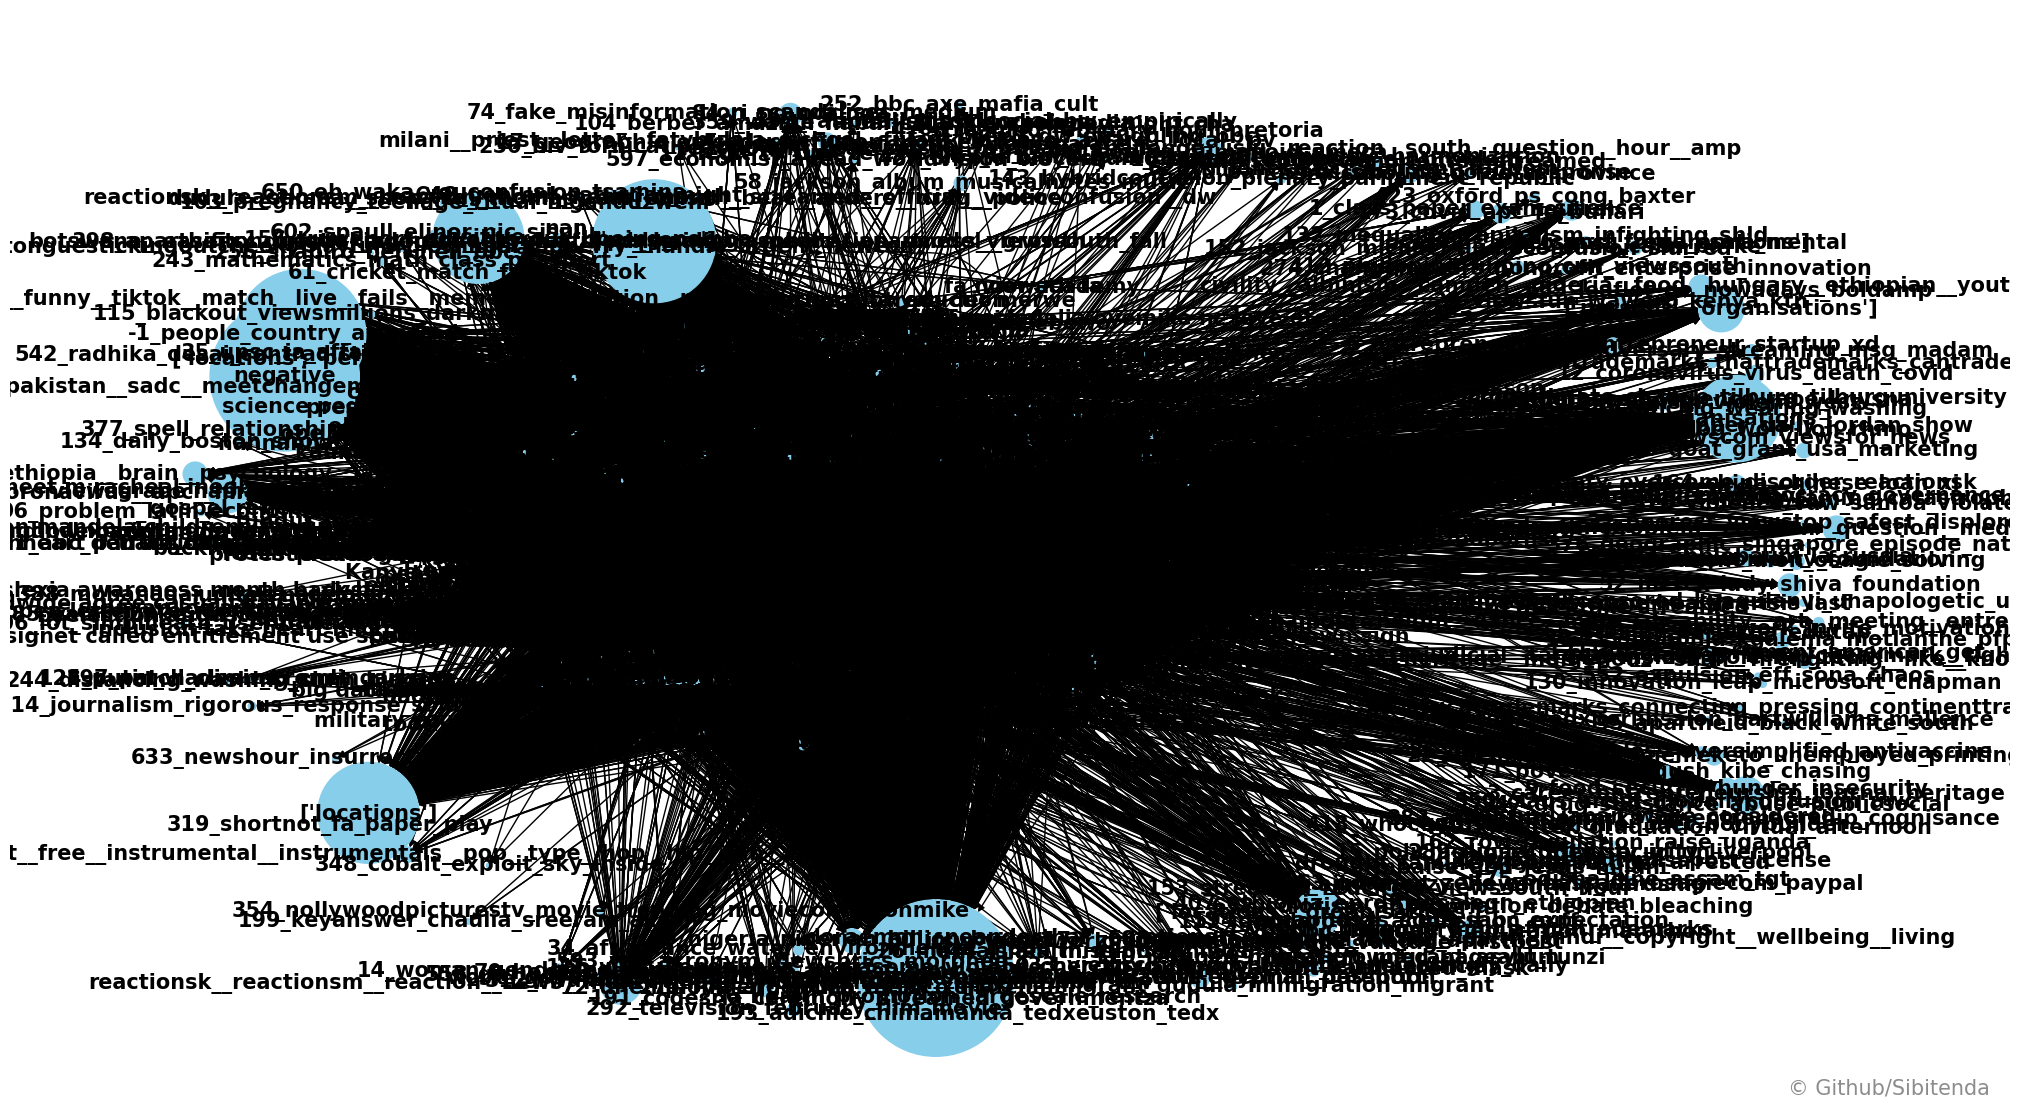

In [30]:
import ast
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Import pandas for data manipulation

# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df[['topic', 'Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category', 'Views']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]  # Corrected entities extraction
    time = row['Date']  # Assuming there is a 'time' column in your DataFrame

    # Add nodes with time information
    G.add_node(topic, type='Topic', time=time)
    G.add_node(sentiment, type='Sentiment', time=time)
    G.add_node(theme, type='Theme', time=time)
    G.add_node(category, type='Category', time=time)
    G.add_node(cluster, type='Cluster', time=time)
    
    for entity in entities:
        G.add_node(entity, type='Entity', time=time)

    # Add edges from Relations with time information
    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type, time=time)

        # Add additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='Sentiment', time=time)
        G.add_edge(head, theme, type='Theme', time=time)
        G.add_edge(head, category, type='Category', time=time)
        G.add_edge(head, cluster, type='Cluster', time=time)
        G.add_edge(head, topic, type='Topic', time=time)

        G.add_edge(tail, sentiment, type='Sentiment', time=time)
        G.add_edge(tail, theme, type='Theme', time=time)
        G.add_edge(tail, category, type='Category', time=time)
        G.add_edge(tail, cluster, type='Cluster', time=time)
        G.add_edge(tail, topic, type='Topic', time=time)

# Save the graph in GEXF file format
nx.write_gexf(G, 'graphgcn2.gexf')

# Compute layout for plotting
pos = nx.spring_layout(G)

# Compute node sizes based on the degree of each node
node_sizes = [5 * G.degree(node) for node in G.nodes()]

# Plot the graph
plt.figure(figsize=(20, 11))
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', font_size=15, font_weight='bold')

# Watermark
plt.text(0.99, 0.01, '© Github/Sibitenda', verticalalignment='bottom', horizontalalignment='right',
         transform=plt.gca().transAxes, color='grey', fontsize=15, alpha=0.9)

# Show the plot
plt.show()


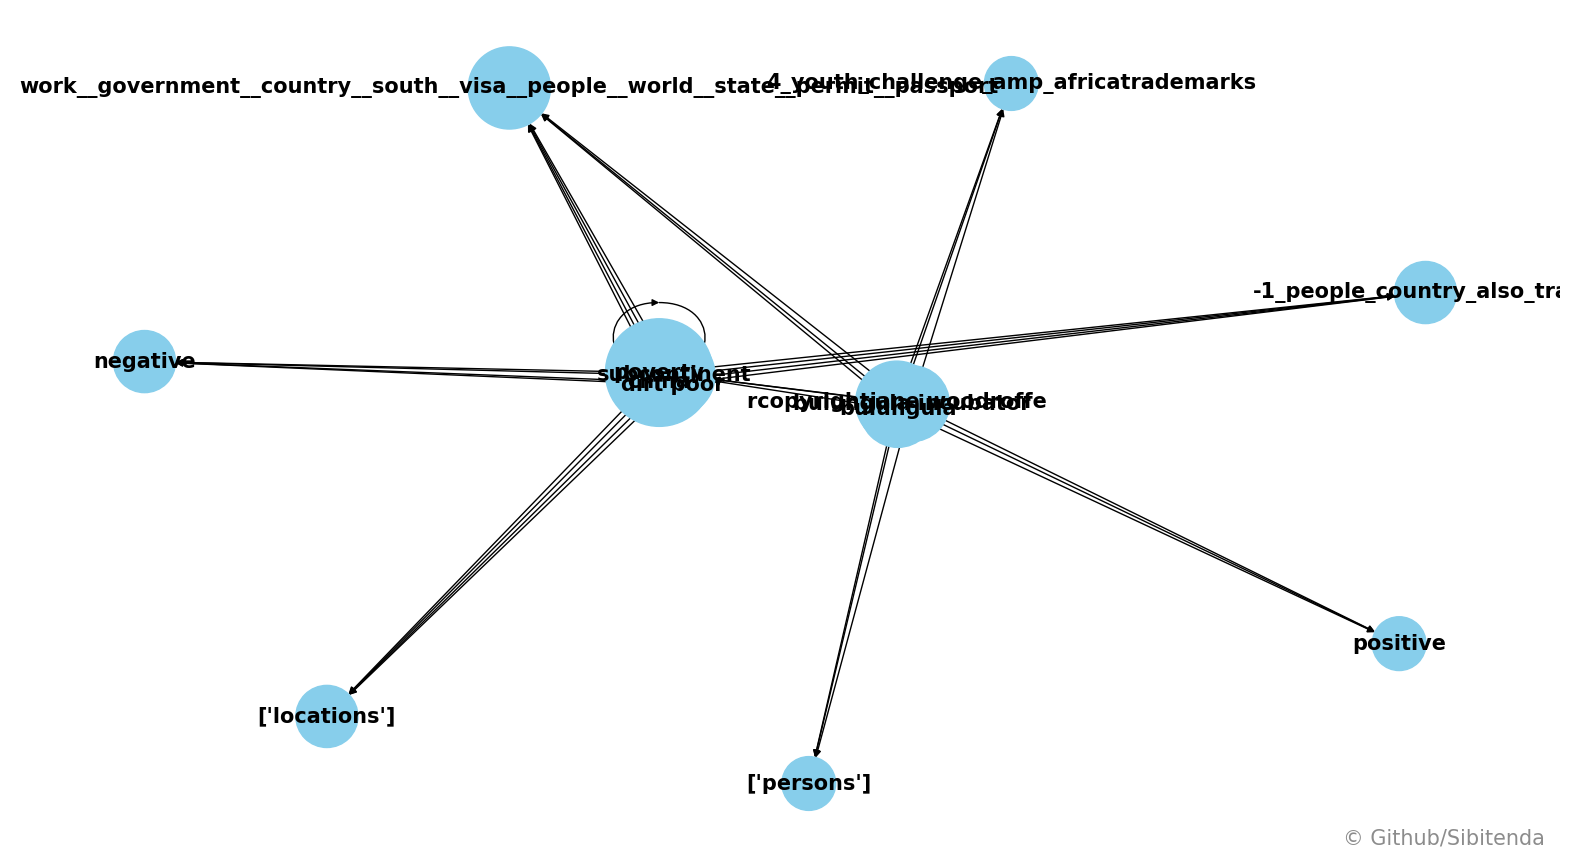

In [41]:
import ast
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df2[['topic', 'Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category', 'Views']]

# Create a directed graph
G = nx.DiGraph()

# Create a dictionary to store 'Views' values for each node
views_dict = {}

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]  # Corrected entities extraction
    time = row['Date']  # Assuming there is a 'time' column in your DataFrame

    # Add nodes with time information
    G.add_node(topic, type='Topic', time=time)
    G.add_node(sentiment, type='Sentiment', time=time)
    G.add_node(theme, type='Theme', time=time)
    G.add_node(category, type='Category', time=time)
    G.add_node(cluster, type='Cluster', time=time)
    
    for entity in entities:
        G.add_node(entity, type='Entity', time=time)
        # Store 'Views' value for Head and Tail nodes
        views = pd.to_numeric(row['Views'], errors='coerce')  # Convert to numeric, handle errors
        if entity in views_dict:
            views_dict[entity].append(views)
        else:
            views_dict[entity] = [views]

    # Add edges from Relations with time and views information
    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type, time=time)

        # Add additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='Sentiment', time=time)
        G.add_edge(head, theme, type='Theme', time=time)
        G.add_edge(head, category, type='Category', time=time)
        G.add_edge(head, cluster, type='Cluster', time=time)
        G.add_edge(head, topic, type='Topic', time=time)

        G.add_edge(tail, sentiment, type='Sentiment', time=time)
        G.add_edge(tail, theme, type='Theme', time=time)
        G.add_edge(tail, category, type='Category', time=time)
        G.add_edge(tail, cluster, type='Cluster', time=time)
        G.add_edge(tail, topic, type='Topic', time=time)

# Save the graph in GEXF file format
nx.write_gexf(G, 'graphgcn2.gexf')

# Compute layout for plotting
pos = nx.spring_layout(G)

# Compute node sizes based on degree
node_sizes = [500 * G.degree[node] for node in G.nodes()]

# Figure
fig, ax = plt.subplots(figsize=(20, 11))

# Plot the graph
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', font_size=15, font_weight='bold', ax=ax)

# Hide axis
ax.axis('off')

# Watermark
ax.text(0.99, 0.01, '© Github/Sibitenda',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='grey',
        fontsize=15,
        alpha=0.9)

# Show the plot
plt.show()


In [12]:
df_education.columns

Index(['Unnamed: 0', 'textid', 'alltext', 'Date', 'Views', 'sourcetype',
       'Text_lemma', 'cluster', 'topic', 'Top_n_words', 'theme',
       'Aspect_Terms', 'Opinion_Words', 'Emotion', 'sentiment', 'Entities',
       'Relations', 'Head', 'Relation_Type', 'Tail', 'Spans', 'category'],
      dtype='object')

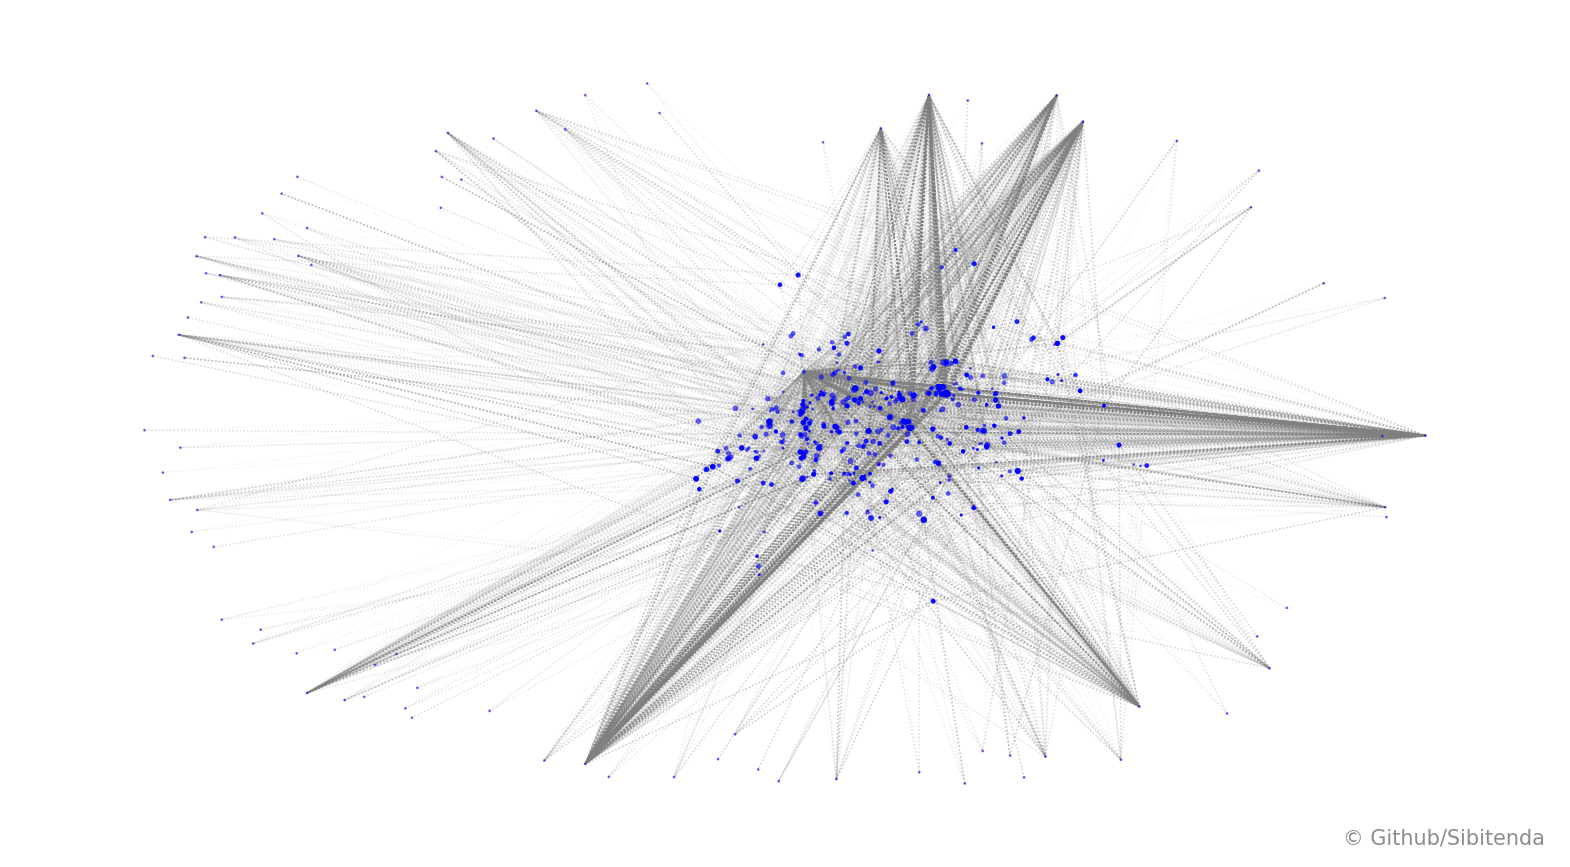

In [14]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df2'
# Extract relevant columns
df_subset = df_education[['topic', 'Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category', 'Views']]

# Create a directed graph
G = nx.DiGraph()

# Create a dictionary to store 'Views' values for each node
views_dict = {}

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    relations = ast.literal_eval(row['Relations'])
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']
    entities = [row['Head'], row['Tail']]  # Corrected entities extraction
    time = row['Date']  # Assuming there is a 'time' column in your DataFrame

    # Add nodes with time and views information
    G.add_node(topic, type='Topic', time=time)
    G.add_node(sentiment, type='Sentiment', time=time)
    G.add_node(theme, type='Theme', time=time)
    G.add_node(category, type='Category', time=time)
    G.add_node(cluster, type='Cluster', time=time)
    
    for entity in entities:
        G.add_node(entity, type='Entity', time=time)
        # Store 'Views' value for Head and Tail nodes
        views = pd.to_numeric(row['Views'], errors='coerce')  # Convert to numeric, handle errors
        if entity in views_dict:
            views_dict[entity].append(views)
        else:
            views_dict[entity] = [views]

    # Add edges from Relations with time and views information
    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        G.add_edge(head, tail, type=relation_type, time=time)

        # Add additional edges for relationships between head/tail and other components
        G.add_edge(head, sentiment, type='Sentiment', time=time)
        G.add_edge(head, theme, type='Theme', time=time)
        G.add_edge(head, category, type='Category', time=time)
        G.add_edge(head, cluster, type='Cluster', time=time)
        G.add_edge(head, topic, type='Topic', time=time)

        G.add_edge(tail, sentiment, type='Sentiment', time=time)
        G.add_edge(tail, theme, type='Theme', time=time)
        G.add_edge(tail, category, type='Category', time=time)
        G.add_edge(tail, cluster, type='Cluster', time=time)
        G.add_edge(tail, topic, type='Topic', time=time)

# Save the graph in GEXF file format
nx.write_gexf(G, 'graphgcneducation.gexf')

# Compute layout for plotting
pos = nx.spring_layout(G)

# Convert node sizes to Python float
node_sizes = [float(np.log1p(sum(views_dict[node]) / len(views_dict[node]))) if node in views_dict and views_dict[node] else 1 for node in G.nodes]

# Figure
fig, ax = plt.subplots(figsize=(20, 11))

# Map "pos" attribute to nodes from pos dict
for node, position in pos.items():
    G.nodes[node]['pos'] = position

# Draw nodes
nx.draw_networkx_nodes(G=G, pos=nx.get_node_attributes(G, 'pos'), node_color='blue', alpha=0.5,
                       node_size=node_sizes)

# Draw edges
nx.draw_networkx_edges(G=G, pos=nx.get_node_attributes(G, 'pos'), edge_color='grey', style="dotted", alpha=0.1,
                       arrows=False)

ax.axis('off')

# Watermark
ax.text(0.99, 0.01, '© Github/Sibitenda',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='grey',
        fontsize=15,
        alpha=0.9)

# Show the plot
plt.show()


In [ ]:
# import ast
# import networkx as nx
# import pandas as pd
# import torch
# import torch.nn.functional as F
# from torch.nn import Linear
# from torch_geometric.nn import GCNConv
# from torch_geometric.data import Data

# # Assuming your data is stored in a DataFrame named 'df2'
# # Extract relevant columns
# df_subset = df2[['topic', 'Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category']]

# # Create a directed graph
# G = nx.DiGraph()

# # Add nodes and edges to the graph
# for _, row in df_subset.iterrows():
#     topic = row['topic']
#     sentiment = row['sentiment']
#     relations = ast.literal_eval(row['Relations'])
#     category = row['category']  # Assuming category is a list
#     theme = row['theme']
#     cluster = row['cluster']
#     entities = [row['Head'], row['Tail']]  # Corrected entities extraction
#     time = row['Date']  # Assuming there is a 'time' column in your DataFrame

#     # Add nodes with time information
#     G.add_node(topic, type='Topic', time=time)
#     G.add_node(sentiment, type='Sentiment', time=time)
#     G.add_node(theme, type='Theme', time=time)
#     G.add_node(category, type='Category', time=time)
#     G.add_node(cluster, type='Cluster', time=time)

#     for entity in entities:
#         G.add_node(entity, type='Entity', time=time)

#     # Add edges from Relations with time information
#     for relation in relations:
#         head = relation['head']
#         relation_type = relation['type']
#         tail = relation['tail']
#         G.add_edge(head, tail, type=relation_type, time=time)

#         # Add additional edges for relationships between head/tail and other components
#         G.add_edge(head, sentiment, type='Sentiment', time=time)
#         G.add_edge(head, theme, type='Theme', time=time)
#         G.add_edge(head, category, type='Category', time=time)
#         G.add_edge(head, cluster, type='Cluster', time=time)
#         G.add_edge(head, topic, type='Topic', time=time)

#         G.add_edge(tail, sentiment, type='Sentiment', time=time)
#         G.add_edge(tail, theme, type='Theme', time=time)
#         G.add_edge(tail, category, type='Category', time=time)
#         G.add_edge(tail, cluster, type='Cluster', time=time)
#         G.add_edge(tail, topic, type='Topic', time=time)

# Convert to PyTorch Geometric Data
edge_list = nx.to_pandas_edgelist(G)

# Check data types and convert to numeric if needed
if edge_list['source'].dtype == 'O':
    edge_list['source'] = pd.factorize(edge_list['source'])[0]

if edge_list['target'].dtype == 'O':
    edge_list['target'] = pd.factorize(edge_list['target'])[0]

# Concatenate positive and negative examples along dimension 0
edge_index = torch.cat([positive_edges, negative_edges], dim=0)
y = torch.cat([torch.ones(positive_edges.size(0)), torch.zeros(negative_edges.size(1))], dtype=torch.long)

# Generate random positive and negative examples for link prediction
positive_edges = edge_index.t().contiguous()
all_possible_edges = torch.combinations(torch.arange(num_nodes), 2).t().contiguous()
# Generate negative edges
# Reshape negative_edges to match the number of columns in positive_edges
negative_edges = negative_edges[:, :positive_edges.size(1)]

# Concatenate positive and negative examples along dimension 0
edge_index = torch.cat([positive_edges, negative_edges], dim=0)
y = torch.cat([torch.ones(positive_edges.size(0)), torch.zeros(negative_edges.size(0))], dtype=torch.long)

# Shuffle the edges and labels
perm = torch.randperm(y.size(0))
edge_index = edge_index[:, perm]
y = y[perm]

# Generate random train/test split (80% train, 20% test)
train_mask = torch.randperm(y.size(0)) < 0.8
test_mask = ~train_mask

# Create PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, train_mask=train_mask, test_mask=test_mask, y=y)

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(data.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Create the model
model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.BCEWithLogitsLoss()

# Define the training and testing functions
def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask].float().view(-1, 1))  # Compute the loss based on the training edges.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = (out > 0).float()
    correct = pred[data.test_mask] == data.y[data.test_mask].float().view(-1, 1)  # Check against ground-truth labels.
    test_acc = int(correct.sum()) / int(data.test_mask.sum())  # Calculate the ratio of correct predictions.
    return test_acc

# Training loop
for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# Test the model
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')


In [ ]:
import numpy as np

# Create a mapping from node labels to integers
node_mapping = {node: idx for idx, node in enumerate(G.nodes)}

# Encode positive edges
positive_edges = torch.tensor(
    [[node_mapping[edge[0]], node_mapping[edge[1]]] for edge in G.edges],
    dtype=torch.long
)

# Generate negative edges with the correct size
negative_edges = torch.randint(num_nodes, (2, positive_edges.size(0)), dtype=torch.long)

# Print sizes
print("Positive Edges Size:", positive_edges.size())
print("Negative Edges Size:", negative_edges.size())

# Concatenate positive and negative examples
edge_index = torch.cat([positive_edges, negative_edges], dim=1)
y = torch.cat([torch.ones(positive_edges.size(0)), torch.zeros(negative_edges.size(1))], dtype=torch.long)


In [ ]:
data

In [ ]:
# import ast
# import networkx as nx
# import pandas as pd
# import torch
# import torch.nn.functional as F
# from torch.nn import Linear
# from torch_geometric.nn import GCNConv
# from torch_geometric.data import Data

# # Assuming your data is stored in a DataFrame named 'df2'
# # Extract relevant columns
# df_subset = df2[['topic', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category']]

# # Create a directed graph
# G = nx.DiGraph()

# # Add nodes and edges to the graph
# for _, row in df_subset.iterrows():
#     topic = row['topic']
#     sentiment = row['sentiment']
#     relations = ast.literal_eval(row['Relations'])
#     category = row['category']  # Assuming category is a list
#     theme = row['theme']
#     cluster = row['cluster']
#     entities = [row['Head'], row['Tail']]  # Corrected entities extraction

#     # Add nodes
#     G.add_node(topic, type='Topic')
#     G.add_node(sentiment, type='Sentiment')
#     G.add_node(theme, type='Theme')
#     G.add_node(category, type='Category')
#     G.add_node(cluster, type='Cluster')

#     for entity in entities:
#         G.add_node(entity, type='Entity')

#     # Add edges from Relations
#     for relation in relations:
#         head = relation['head']
#         relation_type = relation['type']
#         tail = relation['tail']
#         G.add_edge(head, tail, type=relation_type)

#         # Add additional edges for relationships between head/tail and other components
#         G.add_edge(head, sentiment, type='Sentiment')
#         G.add_edge(head, theme, type='Theme')
#         G.add_edge(head, category, type='Category')
#         G.add_edge(head, cluster, type='Cluster')
#         G.add_edge(head, topic, type='Topic')

#         G.add_edge(tail, sentiment, type='Sentiment')
#         G.add_edge(tail, theme, type='Theme')
#         G.add_edge(tail, category, type='Category')
#         G.add_edge(tail, cluster, type='Cluster')
#         G.add_edge(tail, topic, type='Topic')

# # Convert to PyTorch Geometric Data
# edge_list = nx.to_pandas_edgelist(G)

# # Check data types and convert to numeric if needed
# if edge_list['source'].dtype == 'O':
#     edge_list['source'] = pd.factorize(edge_list['source'])[0]

# if edge_list['target'].dtype == 'O':
#     edge_list['target'] = pd.factorize(edge_list['target'])[0]

# # Create PyTorch Geometric Data object
# edge_index = torch.tensor(edge_list[['source', 'target']].values, dtype=torch.long).t().contiguous()
# x = torch.eye(len(G.nodes))  # Replace with your actual features

# # Generate random train/test split (80% train, 20% test)
# num_nodes = len(G.nodes)
# train_mask = torch.randperm(num_nodes) < 0.8
# test_mask = ~train_mask

# # Assign labels randomly for demonstration purposes
# y = torch.randint(0, 2, (num_nodes,), dtype=torch.long)

# # Create PyTorch Geometric Data object
# data = Data(x=x, edge_index=edge_index, train_mask=train_mask, test_mask=test_mask, y=y)

# class GCN(torch.nn.Module):
#     def __init__(self, hidden_channels):
#         super(GCN, self).__init__()
#         torch.manual_seed(1234567)
#         self.conv1 = GCNConv(data.num_features, hidden_channels)
#         self.conv2 = GCNConv(hidden_channels, y.max().item() + 1)

#     def forward(self, x, edge_index):
#         x = self.conv1(x, edge_index)
#         x = x.relu()
#         x = F.dropout(x, p=0.5, training=self.training)
#         x = self.conv2(x, edge_index)
#         return x


# # Create the model
# model = GCN(hidden_channels=16)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
# criterion = torch.nn.CrossEntropyLoss()

# # Define the training and testing functions
# def train():
#     model.train()
#     optimizer.zero_grad()  # Clear gradients.
#     out = model(data.x, data.edge_index)  # Perform a single forward pass.
#     loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss based on the training nodes.
#     loss.backward()  # Derive gradients.
#     optimizer.step()  # Update parameters based on gradients.
#     return loss

# def test():
#     model.eval()
#     out = model(data.x, data.edge_index)
#     pred = out.argmax(dim=1)  # Use the class with the highest probability.
#     test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
#     test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Calculate the ratio of correct predictions.
#     return test_acc

# # Training loop
# for epoch in range(1, 101):
#     loss = train()
#     print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# # Test the model
# test_acc = test()
# print(f'Test Accuracy: {test_acc:.4f}')

# # Visualize the embeddings
# model.eval()
# out = model(data.x, data.edge_index)
# visualize(out, color=data.y)


In [ ]:
from torch_geometric.nn import GATConv


class GAT(torch.nn.Module):
    def __init__(self, hidden_channels, heads):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GATConv(...)  # TODO
        self.conv2 = GATConv(...)  # TODO

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GAT(hidden_channels=8, heads=8)
print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test(mask):
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      correct = pred[mask] == data.y[mask]  # Check against ground-truth labels.
      acc = int(correct.sum()) / int(mask.sum())  # Derive ratio of correct predictions.
      return acc


for epoch in range(1, 201):
    loss = train()
    val_acc = test(data.val_mask)
    test_acc = test(data.test_mask)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

In [ ]:
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# Assuming you have 'train_mask', 'test_mask', 'y' as node attributes
# Adjust the following lines based on your actual data
train_mask = torch.tensor([G.nodes[node]['train_mask'] for node in G.nodes], dtype=torch.bool)
test_mask = torch.tensor([G.nodes[node]['test_mask'] for node in G.nodes], dtype=torch.bool)
y = torch.tensor([G.nodes[node]['y'] for node in G.nodes], dtype=torch.long)

# Define your PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, train_mask=train_mask, test_mask=test_mask, y=y)

# Define your GCN model
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(data.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, data.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Create the model
model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

# Define the training and testing functions
def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)  # Use the class with the highest probability.
    test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Calculate the ratio of correct predictions.
    return test_acc

# Training loop
for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# Test the model
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

# Visualize the embeddings
model.eval()
out = model(data.x, data.edge_index)
visualize(out, color=data.y)


In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

In [ ]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

In [ ]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()
    
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
    
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

model = GCN(hidden_channels=16)
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
    
    
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')   

model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

This tutorial will introduce you to some fundamental concepts regarding deep learning on graphs via Graph Neural Networks based on the **[PyTorch Geometric (PyG) library](https://github.com/rusty1s/pytorch_geometric)**.
PyTorch Geometric is an extension library to the popular deep learning framework [PyTorch](https://pytorch.org/), and consists of various methods and utilities to ease the implementation of Graph Neural Networks.

Following [Kipf et al. (2017)](https://arxiv.org/abs/1609.02907), let's dive into the world of GNNs by looking at a simple graph-structured example, the well-known [**Zachary's karate club network**](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). This graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club. Here, we are interested in detecting communities that arise from the member's interaction.

PyTorch Geometric provides an easy access to this dataset via the [`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets) subpackage:

In [ ]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Importantly, PyG does not distinguish between directed and undirected graphs, and treats undirected graphs as a special case of directed graphs in which reverse edges exist for every entry in `edge_index`.

We can further visualize the graph by converting it to the `networkx` library format, which implements, in addition to graph manipulation functionalities, powerful tools for visualization:

In [ ]:
df2

In [ ]:
import torch
from torch_geometric.data import HeteroData
from torch_geometric.utils import to_undirected

# Assuming your data is stored in a DataFrame named 'df2'
df_subset = df2[['textid', 'Date', 'topic', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category']]

# Initialize HeteroData
data = HeteroData()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    date = row['Date']
    topic = row['topic']
    theme = row['theme']
    cluster = row['cluster']
    sentiment = row['sentiment']
    category = row['category']
    head = row['Head']
    tail = row['Tail']

    # Add nodes with time information
    data['date'].x = torch.tensor([date.timestamp()])  # Example feature, you should replace this with actual node features
    data['topic'].x = torch.tensor([topic])
    # Add edges with time information
    data['head_tail', (head, tail)].edge_index = torch.tensor([[textid, textid]], dtype=torch.long)  # Example edge_index, you should replace this with the actual edge_index

    # Add additional edges for relationships between head/tail and other components
    relationships = ['topic', 'theme', 'cluster', 'sentiment', 'category']
    for rel in relationships:
        data['head_tail', (head, tail), rel].edge_index = torch.tensor([[textid, textid]], dtype=torch.long)  # Example edge_index, you should replace this with the actual edge_index

# Convert the graph to PyTorch Geometric Data
data = to_undirected(data)

# Rest of your code...


In [ ]:
# import ast
# import networkx as nx
# import plotly.graph_objects as go
# import plotly.express as px
# import pandas as pd
# from datetime import timezone

# # Assuming your data is stored in a DataFrame named 'df2'
# # Extract relevant columns
# df2["Date"] = pd.to_datetime(df2["Date"])
# df_subset = df2[['topic', 'Date', 'theme', 'cluster', 'Head', 'Tail', 'sentiment', 'Relations', 'category']]

# # Create a directed graph
# G = nx.DiGraph()

# # Add nodes and edges to the graph
# for _, row in df_subset.iterrows():
#     topic = row['topic']
#     sentiment = row['sentiment']
#     relations = ast.literal_eval(row['Relations'])
#     category = row['category']  # Assuming category is a list
#     theme = row['theme']
#     cluster = row['cluster']
#     entities = [row['Head'], row['Tail']]  # Corrected entities extraction
#     time = pd.to_datetime(row['Date']).replace(tzinfo=timezone.utc)  # Assuming 'Date' is timezone-naive

#     # Add nodes with time information
#     G.add_node(topic, type='Topic', time=time)
#     G.add_node(sentiment, type='Sentiment', time=time)
#     G.add_node(theme, type='Theme', time=time)
#     G.add_node(category, type='Category', time=time)
#     G.add_node(cluster, type='Cluster', time=time)

#     for entity in entities:
#         G.add_node(entity, type='Entity', time=time)

#     # Add edges from Relations with time information
#     for relation in relations:
#         head = relation['head']
#         relation_type = relation['type']
#         tail = relation['tail']
#         G.add_edge(head, tail, type=relation_type, time=time)

#         # Add additional edges for relationships between head/tail and other components
#         G.add_edge(head, sentiment, type='Sentiment', time=time)
#         G.add_edge(head, theme, type='Theme', time=time)
#         G.add_edge(head, category, type='Category', time=time)
#         G.add_edge(head, cluster, type='Cluster', time=time)
#         G.add_edge(head, topic, type='Topic', time=time)

#         G.add_edge(tail, sentiment, type='Sentiment', time=time)
#         G.add_edge(tail, theme, type='Theme', time=time)
#         G.add_edge(tail, category, type='Category', time=time)
#         G.add_edge(tail, cluster, type='Cluster', time=time)
#         G.add_edge(tail, topic, type='Topic', time=time)

# # Create Plotly figure
# fig = px.scatter()

# # Grab unique months in the dataset
# months = [
#     i.to_timestamp("D") for i in pd.to_datetime(
#         df_subset["Date"]
#     ).dt.to_period("M").sort_values().unique()
# ]

# # Loop through months
# for i, month in enumerate(months):
#     month_str = month.strftime("%Y-%m")

#     # Duplicate original graph for a new graph in the current month
#     new_G = G.copy()

#     # Extract nodes and edges to remove
#     nodes_to_remove = [
#         node for node in new_G.nodes() 
#         if "time" in new_G.nodes[node] 
#         and new_G.nodes[node]["time"] >= month
#     ]
#     edges_to_remove = [
#         (u, v) for u, v, data in new_G.edges(data=True) 
#         if "time" in data and data["time"] >= month
#     ]

#     # Remove self-loops
#     for u, v, label in new_G.edges(data=True):
#         if u == v:
#             new_G.remove_edge(u, v)

#     # Remove nodes and edges from the new graph
#     new_G.remove_edges_from(edges_to_remove)
#     new_G.remove_nodes_from(nodes_to_remove)

#     # Plot the new graph for this month and add to the figure
#     for node, pos in nx.spring_layout(new_G).items():
#         fig.add_trace(go.Scatter(
#             x=[pos[0]],
#             y=[pos[1]],
#             mode='markers',
#             marker=dict(size=10, color='skyblue'),
#             text=[f"{node}<br>Time: {time}"],
#             name='Nodes',
#             hoverinfo='text',
#             visible=False if i > 0 else True  # Make only the first graph visible initially
#         ))

#     for edge in new_G.edges():
#         x0, y0 = nx.spring_layout(new_G)[edge[0]]
#         x1, y1 = nx.spring_layout(new_G)[edge[1]]
#         fig.add_trace(go.Scatter(
#             x=[x0, x1, None],
#             y=[y0, y1, None],
#             mode='lines',
#             line=dict(color='gray'),
#             name='Edges',
#             hoverinfo='none',
#             visible=False if i > 0 else True  # Make only the first graph visible initially
#         ))

#     # Configure slider
#     steps = []
#     for j in range(i + 1):
#         visibility = [False] * len(months) * 2   # Make all traces not visible by default
#         visibility[j * 2] = True   # Make trace for nodes visible
#         visibility[j * 2 + 1] = True    # Make trace for edges visible
#         step = dict(
#             method="update",
#             label=f"Month: {months[j].strftime('%Y-%m')}",
#             args=[{"visible": visibility}],
#         )
#         steps.append(step)

#     # Update layout for the current month
#     fig.update_layout(
#         showlegend=False,
#         hovermode='closest',
#         title=f"Time Series Graph Visualization for Month: {month_str}",
#         xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#         yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#         sliders=[
#             dict(
#                 active=0,
#                 steps=steps,
#                 pad={"t": 50}
#             ),
#         ],
#     )

# # Save the Plotly figure as an HTML file
# fig.write_html("graph_visualization.html")

# # Show the Plotly figure
# fig.show()


In [ ]:
# Save the Plotly figure as an HTML file
fig.write_html("graph_visualization.html")


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import HeteroData, DataLoader
from torch_geometric.nn import HANConv, GATConv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import ast

# Assuming df2 is already defined with the provided data

# Extract relevant columns
df_subset = df2[['textid', 'category', 'Entities', 'Relations', 'Head', 'Relation_Type', 'Tail', 'Entity_Pairs', 'sentiment', 'topic', 'theme', 'cluster']]

# Preprocess data
le_category = LabelEncoder()
le_sentiment = LabelEncoder()
le_topic = LabelEncoder()
le_theme = LabelEncoder()
le_cluster = LabelEncoder()

df_subset['category'] = le_category.fit_transform(df_subset['category'])
df_subset['sentiment'] = le_sentiment.fit_transform(df_subset['sentiment'])
df_subset['topic'] = le_topic.fit_transform(df_subset['topic'])
df_subset['theme'] = le_theme.fit_transform(df_subset['theme'])
df_subset['cluster'] = le_cluster.fit_transform(df_subset['cluster'])

# Split the data into training, validation, and testing sets
train_data, test_data = train_test_split(df_subset, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

# Create a HeteroData object
data = HeteroData()

# Add nodes with types
data['textid'].x = torch.eye(len(df_subset['textid']))
data['Entities'].x = torch.eye(len(df_subset['Entities']))
data['Head'].x = torch.eye(len(df_subset['Head']))
data['Tail'].x = torch.eye(len(df_subset['Tail']))
data['sentiment'].x = torch.eye(len(df_subset['sentiment']))
data['topic'].x = torch.eye(len(df_subset['topic']))
data['theme'].x = torch.eye(len(df_subset['theme']))
data['cluster'].x = torch.eye(len(df_subset['cluster']))

# Preprocess 'Entity_Pairs' column
df_subset['Entity_Pairs'] = df_subset['Entity_Pairs'].apply(lambda x: [pair.strip() for pair in x.split(',')])

# Add edges with types
edge_index_entities = torch.tensor(list(df_subset['Entity_Pairs'])).t().contiguous()
data.add_edge_index(edge_index_entities, 'Entities', 'Entities')

# Add additional edges
head_nodes = list(df_subset['Head'])
tail_nodes = list(df_subset['Tail'])
sentiment_nodes = list(df_subset['sentiment'])
theme_nodes = list(df_subset['theme'])
category_nodes = list(df_subset['category'])
cluster_nodes = list(df_subset['cluster'])
topic_nodes = list(df_subset['topic'])

# Add edges from head to sentiment, theme, topic, category, and cluster
for head, sentiment, theme, topic, category, cluster in zip(head_nodes, sentiment_nodes, theme_nodes, topic_nodes, category_nodes, cluster_nodes):
    data.add_edge_index(torch.tensor([(head, sentiment)]).t().contiguous(), 'Head', 'sentiment')
    data.add_edge_index(torch.tensor([(head, theme)]).t().contiguous(), 'Head', 'theme')
    data.add_edge_index(torch.tensor([(head, topic)]).t().contiguous(), 'Head', 'topic')
    data.add_edge_index(torch.tensor([(head, category)]).t().contiguous(), 'Head', 'category')
    data.add_edge_index(torch.tensor([(head, cluster)]).t().contiguous(), 'Head', 'cluster')

# Add edges from tail to sentiment, theme, topic, category, and cluster
for tail, sentiment, theme, topic, category, cluster in zip(tail_nodes, sentiment_nodes, theme_nodes, topic_nodes, category_nodes, cluster_nodes):
    data.add_edge_index(torch.tensor([(tail, sentiment)]).t().contiguous(), 'Tail', 'sentiment')
    data.add_edge_index(torch.tensor([(tail, theme)]).t().contiguous(), 'Tail', 'theme')
    data.add_edge_index(torch.tensor([(tail, topic)]).t().contiguous(), 'Tail', 'topic')
    data.add_edge_index(torch.tensor([(tail, category)]).t().contiguous(), 'Tail', 'category')
    data.add_edge_index(torch.tensor([(tail, cluster)]).t().contiguous(), 'Tail', 'cluster')

# Define the HAN model
class HAN(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super(HAN, self).__init__()

        # Heterogeneous Graph Convolutional layers
        self.conv1 = HANConv(in_dim, hidden_dim)
        self.conv2 = HANConv(hidden_dim, hidden_dim)

        # Classification layer
        self.classifier = nn.Linear(hidden_dim, out_dim)

    def forward(self, x, edge_indices):
        x = self.conv1(x, edge_indices)
        x = torch.relu(x)
        x = self.conv2(x, edge_indices)
        x = torch.relu(x)
        x = self.classifier(x['textid'])  # Assuming 'textid' is the target node type
        return torch.log_softmax(x, dim=-1)

# Instantiate the model
num_node_types = len(data.keys)
model = HAN(in_dim=64, hidden_dim=64, out_dim=len(le_category.classes_))

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create DataLoader for PyTorch Geometric Data objects
train_loader = DataLoader([data[i] for i in train_data['textid']], batch_size=1, shuffle=True)
val_loader = DataLoader([data[i] for i in val_data['textid']], batch_size=1)
test_loader = DataLoader([data[i] for i in test_data['textid']], batch_size=1)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        output = model(batch, data.edge_index_dict)
        loss = criterion(output, torch.tensor([batch.y.item()]))  # Assuming 'category' is the label
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

# Validation
model.eval()
with torch.no_grad():
    for batch in val_loader:
        val_output = model(batch, data.edge_index_dict)
        val_loss = criterion(val_output, torch.tensor([batch.y.item()]))  # Assuming 'category' is the label

    print(f'Validation Loss: {val_loss.item()}')

# Testing
model.eval()
with torch.no_grad():
    for batch in test_loader:
        test_output = model(batch, data.edge_index_dict)
        test_loss = criterion(test_output, torch.tensor([batch.y.item()]))  # Assuming 'category' is the label

    print(f'Test Loss: {test_loss.item()}')


In [ ]:
df2['Entity_Pairs']

In [ ]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df2[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    category = row['category'][0]   # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(theme, type='Theme')
    G.add_node(category, type='Category')
    G.add_node(cluster, type='Cluster')

    # Add edges between Topic, Sentiment, Head, Tail, and Theme
#     G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(topic, head, type='Topic_Head')
    G.add_edge(topic, tail, type='Topic_Tail')
#     G.add_edge(theme, sentiment, type='Theme_Sentiment')
#     G.add_edge(category, sentiment, type='Category_Sentiment')

#     G.add_edge(topic, theme, type='Topics_Theme')
#     G.add_edge(topic, category, type='Topic_Category')

#     G.add_edge(theme, category, type='Theme_Category')
#     G.add_edge(theme, head, type='Theme_Head')
#     G.add_edge(theme, tail, type='Theme_Tail')
    G.add_edge(sentiment, head, type='sentiment_Head')
#     G.add_edge(sentiment, tail, type='sentiment_Tail')
    
#     G.add_edge(category, head, type='Category_Head')
#     G.add_edge(category, tail, type='Category_Tail')
    
#     G.add_edge(cluster, head, type='Cluster_Head')
#     G.add_edge(cluster, tail, type='Cluster_Tail')

    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, node_color='skyblue', font_color='black')  # Adjusted node_size
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_21.gexf")


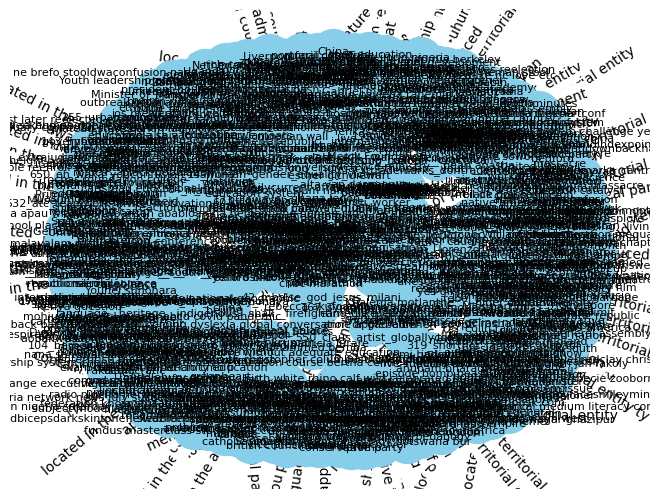

In [19]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df_education[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    category = row['category']  # Assuming category is a list
    theme = row['theme']
    cluster = row['cluster']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(theme, type='Theme')
    G.add_node(category, type='Category')
    G.add_node(cluster, type='Cluster')

    # Add edges between Topic, Sentiment, Head, Tail, and Theme
#     G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(topic, head, type='Topic')
    G.add_edge(topic, tail, type='Topic')
#     G.add_edge(theme, sentiment, type='Theme_Sentiment')
#     G.add_edge(category, sentiment, type='Category_Sentiment')

#     G.add_edge(topic, theme, type='Topics_Theme')
#     G.add_edge(topic, category, type='Topic_Category')

#     G.add_edge(theme, category, type='Theme_Category')
    G.add_edge(theme, head, type='Theme')
    G.add_edge(theme, tail, type='Theme')
    G.add_edge(sentiment, head, type='sentiment')
    G.add_edge(sentiment, tail, type='sentiment')
    
    G.add_edge(category, head, type='Category')
    G.add_edge(category, tail, type='Category')
    
    G.add_edge(cluster, head, type='Cluster')
    G.add_edge(cluster, tail, type='Cluster')

    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, node_color='skyblue', font_color='black')  # Adjusted node_size
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [20]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_2educ.gexf")


In [ ]:
df['theme'].unique()

In [11]:

df_education = df[df['theme'] == 'education']
df_poverty = df[df['theme'] == 'poverty']
df_health = df[df['theme'] == 'health']
df_employment = df[df['theme'] == 'employment']
df_security = df[df['theme'] == 'security']
df_hunger = df[df['theme'] == 'hunger']
print(df_education.shape)


(24143, 22)


In [ ]:
df_education.columns

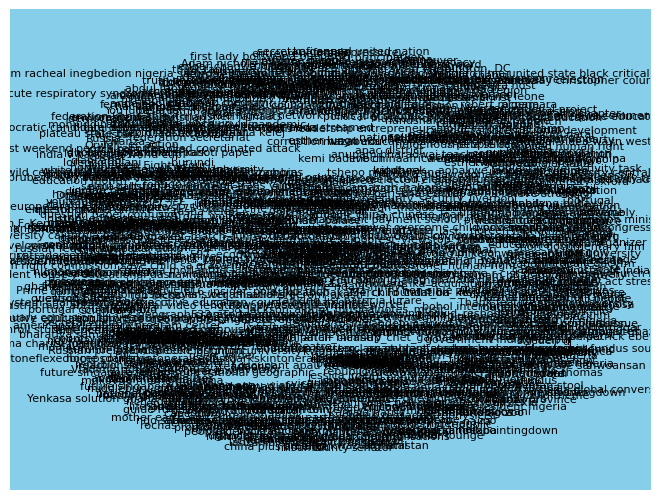

In [16]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df_education[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    category = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(theme, type='Theme')

    # Add edges between Topic, Sentiment, Head, Tail, and Theme
    G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(topic, head, type='Topic_Head')
    G.add_edge(topic, tail, type='Topic_Tail')
    G.add_edge(theme, sentiment, type='Theme_Sentiment')
    G.add_edge(category, sentiment, type='Category_Sentiment')

    G.add_edge(topic, theme, type='Topics_Theme')
    G.add_edge(topic, category, type='Topic_Category')

    G.add_edge(theme, category, type='Theme_Category')
    G.add_edge(theme, head, type='Theme_Head')
    G.add_edge(theme, tail, type='Theme_Tail')
    G.add_edge(sentiment, head, type='sentiment_Head')
    G.add_edge(sentiment, tail, type='sentiment_Tail')
    
    G.add_edge(category, head, type='Category_Head')
    G.add_edge(category, tail, type='Category_Tail')
    
    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [17]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_education.gexf")


In [ ]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df_poverty[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    category = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(theme, type='Theme')

    # Add edges between Topic, Sentiment, Head, Tail, and Theme
    G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(topic, head, type='Topic_Head')
    G.add_edge(topic, tail, type='Topic_Tail')
    G.add_edge(theme, sentiment, type='Theme_Sentiment')
    G.add_edge(category, sentiment, type='Category_Sentiment')

    G.add_edge(topic, theme, type='Topics_Theme')
    G.add_edge(topic, category, type='Topic_Category')

    G.add_edge(theme, category, type='Theme_Category')
    G.add_edge(theme, head, type='Theme_Head')
    G.add_edge(theme, tail, type='Theme_Tail')
    G.add_edge(sentiment, head, type='sentiment_Head')
    G.add_edge(sentiment, tail, type='sentiment_Tail')
    
    G.add_edge(category, head, type='Category_Head')
    G.add_edge(category, tail, type='Category_Tail')
    
    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_poverty.gexf")


In [ ]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df_hunger[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    category = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(theme, type='Theme')

    # Add edges between Topic, Sentiment, Head, Tail, and Theme
    G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(topic, head, type='Topic_Head')
    G.add_edge(topic, tail, type='Topic_Tail')
    G.add_edge(theme, sentiment, type='Theme_Sentiment')
    G.add_edge(category, sentiment, type='Category_Sentiment')

    G.add_edge(topic, theme, type='Topics_Theme')
    G.add_edge(topic, category, type='Topic_Category')

    G.add_edge(theme, category, type='Theme_Category')
    G.add_edge(theme, head, type='Theme_Head')
    G.add_edge(theme, tail, type='Theme_Tail')
    G.add_edge(sentiment, head, type='sentiment_Head')
    G.add_edge(sentiment, tail, type='sentiment_Tail')
    
    G.add_edge(category, head, type='Category_Head')
    G.add_edge(category, tail, type='Category_Tail')
    
    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_hunger.gexf")


In [ ]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df_security[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    category = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(theme, type='Theme')

    # Add edges between Topic, Sentiment, Head, Tail, and Theme
    G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(topic, head, type='Topic_Head')
    G.add_edge(topic, tail, type='Topic_Tail')
    G.add_edge(theme, sentiment, type='Theme_Sentiment')
    G.add_edge(category, sentiment, type='Category_Sentiment')

    G.add_edge(topic, theme, type='Topics_Theme')
    G.add_edge(topic, category, type='Topic_Category')

    G.add_edge(theme, category, type='Theme_Category')
    G.add_edge(theme, head, type='Theme_Head')
    G.add_edge(theme, tail, type='Theme_Tail')
    G.add_edge(sentiment, head, type='sentiment_Head')
    G.add_edge(sentiment, tail, type='sentiment_Tail')
    
    G.add_edge(category, head, type='Category_Head')
    G.add_edge(category, tail, type='Category_Tail')
    
    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_security.gexf")


In [ ]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df_employment[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    category = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(theme, type='Theme')

    # Add edges between Topic, Sentiment, Head, Tail, and Theme
    G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(topic, head, type='Topic_Head')
    G.add_edge(topic, tail, type='Topic_Tail')
    G.add_edge(theme, sentiment, type='Theme_Sentiment')
    G.add_edge(category, sentiment, type='Category_Sentiment')

    G.add_edge(topic, theme, type='Topics_Theme')
    G.add_edge(topic, category, type='Topic_Category')

    G.add_edge(theme, category, type='Theme_Category')
    G.add_edge(theme, head, type='Theme_Head')
    G.add_edge(theme, tail, type='Theme_Tail')
    G.add_edge(sentiment, head, type='sentiment_Head')
    G.add_edge(sentiment, tail, type='sentiment_Tail')
    
    G.add_edge(category, head, type='Category_Head')
    G.add_edge(category, tail, type='Category_Tail')
    
    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_employment.gexf")


In [ ]:
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df_health[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    category = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(theme, type='Theme')

    # Add edges between Topic, Sentiment, Head, Tail, and Theme
    G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(topic, head, type='Topic_Head')
    G.add_edge(topic, tail, type='Topic_Tail')
    G.add_edge(theme, sentiment, type='Theme_Sentiment')
    G.add_edge(category, sentiment, type='Category_Sentiment')

    G.add_edge(topic, theme, type='Topics_Theme')
    G.add_edge(topic, category, type='Topic_Category')

    G.add_edge(theme, category, type='Theme_Category')
    G.add_edge(theme, head, type='Theme_Head')
    G.add_edge(theme, tail, type='Theme_Tail')
    G.add_edge(sentiment, head, type='sentiment_Head')
    G.add_edge(sentiment, tail, type='sentiment_Tail')
    
    G.add_edge(category, head, type='Category_Head')
    G.add_edge(category, tail, type='Category_Tail')
    
    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph_health.gexf")


In [ ]:
import ast

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
#     cluster = row['cluster']
    categories = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
#     G.add_node(cluster, type='Cluster')
    
#     # Add nodes for each value in the 'category' list
#     for category in categories:
#         G.add_node(category, type='Category')
    
    G.add_node(theme, type='Theme')

    # Add edges between Topic, Sentiment, Cluster, Category, and Theme
    G.add_edge(topic, sentiment, type='Topic_Sentiment')
    G.add_edge(head, sentiment, type='Entity_Sentiment')
    G.add_edge(tail, sentiment, type='Entity_Sentiment')
    G.add_edge(theme, sentiment, type='Theme_sentiment')
    G.add_edge(category, sentiment, type='Category_sentiment')
# #     G.add_edge(topic, cluster, type='Topic-Cluster')
#     for category in categories:
#         G.add_edge(topic, category, type='Topic-Category')
    G.add_edge(topic, theme, type='Topics_Theme')
    G.add_edge(topic, category, type='Topic_category')
    G.add_edge(topic, head, type='Topic_Head')
    G.add_edge(topic, tail, type='Topic-Tail')

    G.add_edge(theme, category, type='Theme_Category')
    G.add_edge(theme, head, type='Theme_Head')
    G.add_edge(theme, tail, type='Theme_Tail')
    
    G.add_edge(category, head, type='Category_Head')
    G.add_edge(category, tail, type='Category_Tail')
    
    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=row['Relation_type'])

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph4.gexf")


In [ ]:
import ast

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df[['topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    cluster = row['cluster']
    categories = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(cluster, type='Cluster')
    
    # Add nodes for each value in the 'category' list
    for category in categories:
        G.add_node(category, type='Category')
    
    G.add_node(theme, type='Theme')

    # Add edges between Topic, Sentiment, Cluster, Category, and Theme
    G.add_edge(topic, sentiment, type='Topic-Sentiment')
    G.add_edge(topic, cluster, type='Topic-Cluster')
    for category in categories:
        G.add_edge(topic, category, type='Topic-Category')
    G.add_edge(topic, theme, type='Topic-Theme')

    # Add edges between Topic and Head
    G.add_edge(topic, head, type='Topic-Head')

    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph3.gexf")


In [ ]:
import ast

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df[['Text_lemma', 'topic', 'theme', 'cluster', 'sentiment', 'Head', 'Relation_Type', 'Tail', 'category']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df_subset.iterrows():
    text = row['Text_lemma']
    topic = row['topic']
    sentiment = row['sentiment']
    head = row['Head']
    relation_type = row['Relation_Type']
    tail = row['Tail']
    cluster = row['cluster']
    categories = row['category']  # Assuming category is a list
    theme = row['theme']

    # Add nodes
#     G.add_node(text, type='Text')
    G.add_node(topic, type='Topic')
    G.add_node(sentiment, type='Sentiment')
    G.add_node(head, type='Head')
    G.add_node(tail, type='Tail')
    G.add_node(cluster, type='Cluster')
    
    # Add nodes for each value in the 'category' list
    for category in categories:
        G.add_node(category, type='Category')
    
    G.add_node(theme, type='Theme')

    # Add edges between Text, Topic, Sentiment, Cluster, Category, and Theme
    G.add_edge(text, topic, type='Text-Topic')
    G.add_edge(text, sentiment, type='Topic-Sentiment')
    G.add_edge(text, cluster, type='Topic-Cluster')
    for category in categories:
        G.add_edge(text, category, type='Topic-Category')
    G.add_edge(text, theme, type='Topic-Theme')

    # Add edges between Text and Head
    G.add_edge(text, head, type='Text-Head')

    # Add edges between Head and Tail using the 'Relation_Type' column
    G.add_edge(head, tail, type=relation_type)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
# df['category']
# Save the graph to a GEXF file (Gephi file format)
nx.write_gexf(G, "graph2.gexf")


In [ ]:
df.shape

In [ ]:
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Graph

# Assuming your data is stored in a DataFrame named 'df'
# Extract relevant columns
df_subset = df[['topic', 'theme', 'cluster', 'sentiment', 'Entity_Pairs', 'Relations', 'category']]

# Create a directed graph
nodes = []
links = []

for _, row in df_subset.iterrows():
    topic = row['topic']
    sentiment = row['sentiment']
    entities = row['Entity_Pairs']
    relations = ast.literal_eval(row['Relations'])  # Convert the string to a dictionary
    cluster = row['cluster']
    categories = row['category']  # Assuming category is a list
    theme = row['theme']

    nodes.extend([
        {"name": topic, "symbolSize": 10, "category": "Topic"},
        {"name": sentiment, "symbolSize": 10, "category": "Sentiment"},
        {"name": cluster, "symbolSize": 10, "category": "Cluster"},
        {"name": theme, "symbolSize": 10, "category": "Theme"},
    ])

    for category in categories:
        nodes.append({"name": category, "symbolSize": 10, "category": "Category"})

    links.extend([
        {"source": topic, "target": sentiment},
        {"source": topic, "target": cluster},
        {"source": topic, "target": theme},
    ])

    for entity in entities:
        nodes.append({"name": entity, "symbolSize": 5, "category": "Entity"})
        links.append({"source": topic, "target": entity})

    for relation in relations:
        head = relation['head']
        relation_type = relation['type']
        tail = relation['tail']
        nodes.append({"name": head, "symbolSize": 5, "category": "Relation"})
        nodes.append({"name": tail, "symbolSize": 5, "category": "Relation"})
        links.append({"source": head, "target": tail, "value": relation_type})

# Create the graph
graph = (
    Graph(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add(
        "",
        nodes=nodes,
        links=links,
        layout="force",
        edge_symbol=["circle", "arrow"],
        edge_symbol_size=[4, 10],
        label_opts=opts.LabelOpts(is_show=False),
        linestyle_opts=opts.LineStyleOpts(color="source", curve=0.3),
        emphasis_label_opts=opts.LabelOpts(
            is_show=True, color="#fff", position="inside", font_size=10
        ),

#         emphasis_edge_opts=opts.EdgeStyleOpts(
#             color="#FFA500", curve=0.3, width=2, opacity=0.7
#         ),
        emphasis_edge_opts=opts.LineStyleOpts(
            color="#FFA500", curve=0.3, width=2, opacity=0.7
        ),

    )
    .set_global_opts(
        legend_opts=opts.LegendOpts(is_show=False),
        title_opts=opts.TitleOpts(title="Interactive Graph"),
    )
)

# Save the graph as an HTML file
graph.render("interactive_graph.html")


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
import pandas as pd

# Assuming 'Type' is the column containing relation labels
num_labels = len(df['Relation_Type'].unique())

# Load BERT tokenizer and model for sequence classification
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels).to('cuda')  # Adjust num_labels and move the model to CUDA

# Assuming 'Type' is the column containing relation labels
df['relation_type'] = df['Relation_Type'].apply(lambda x: str(x))
num_labels = len(df['relation_type'].unique())

# Add label ids to the DataFrame
df['label_id'] = df['relation_type'].astype('category').cat.codes

# Convert 'head' and 'tail' columns to lists
df['Head'] = df['Head'].apply(lambda x: [x])
df['Tail'] = df['Tail'].apply(lambda x: [x])

# Split the dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

class CustomDataset(Dataset):
    def __init__(self, df, max_length=64):
        self.df = df
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        inputs = tokenizer(
            self.df.iloc[idx]["Text_lemma"],
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt",
        )
        label = torch.tensor(self.df.iloc[idx]["label_id"]).long().to('cuda')  # Convert to long for CrossEntropyLoss and move to CUDA
        return {"input_ids": inputs["input_ids"].squeeze(), "attention_mask": inputs["attention_mask"].squeeze(), "label": label}

# Training arguments
training_args = TrainingArguments(
    output_dir="./bert_relation_classification",
    per_device_train_batch_size=8,
    save_total_limit=1,
    num_train_epochs=3,
    evaluation_strategy="steps",
    eval_steps=100,
    logging_steps=100,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
)

# Training in chunks
chunk_size = 1000
for start in range(0, len(train_df), chunk_size):
    end = start + chunk_size
    chunk_train_df = train_df.iloc[start:end]

    # Create dataset for the current chunk
    chunk_train_dataset = CustomDataset(chunk_train_df)

    # Update trainer's train_dataset
    trainer.train_dataset = chunk_train_dataset

    # Create evaluation dataset for the current chunk
    chunk_eval_dataset = CustomDataset(test_df)  # You might need to modify this based on your requirements

    # Update trainer's eval_dataset
    trainer.eval_dataset = chunk_eval_dataset

    # Train the model on the current chunk
    trainer.train()

# Evaluate the model on the test set
results = trainer.evaluate(chunk_eval_dataset)

# Print evaluation results
print("***** Evaluation Results *****")
for key, value in results.items():
    print(f"{key}: {value}")

# Get predictions on the test set
predictions = trainer.predict(chunk_eval_dataset)

# Convert logits (numpy array) to PyTorch tensor
predicted_labels = torch.argmax(torch.from_numpy(predictions.predictions), dim=1)

# Convert tensor to list
predicted_labels = predicted_labels.tolist()
true_labels = test_df['label_id'].tolist()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Calculate precision, recall, f1 score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
import pandas as pd

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Assuming 'category' is the column containing labels
# Convert the 'category' column to a string representation
df['category'] = df['Entity_Categories'].apply(lambda x: str(x))
num_labels = len(df['category'].unique())

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

# Add label ids to the DataFrame
df['label_id'] = df['category'].astype('category').cat.codes

# Convert 'head' and 'tail' columns to lists
df['Head'] = df['Head'].apply(lambda x: [x])
df['Tail'] = df['Tail'].apply(lambda x: [x])

# Split the dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

class CustomDataset(Dataset):
    def __init__(self, df, max_length=64):
        self.df = df
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        inputs = tokenizer(
            self.df.iloc[idx]["Text_lemma"],
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt",
        )
        label = torch.tensor(self.df.iloc[idx]["label_id"]).long()  # Convert to long for BCEWithLogitsLoss
        return {"input_ids": inputs["input_ids"].squeeze(), "attention_mask": inputs["attention_mask"].squeeze(), "label": label}

# Training arguments
training_args = TrainingArguments(
    output_dir="./bert_joint_entity_relation",
    per_device_train_batch_size=8,
    save_total_limit=1,
    num_train_epochs=3,
    evaluation_strategy="steps",
    eval_steps=100,
    logging_steps=100,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
)

# Training in chunks
chunk_size = 1000
for start in range(0, len(train_df), chunk_size):
    end = start + chunk_size
    chunk_train_df = train_df.iloc[start:end]

    # Create dataset for the current chunk
    chunk_train_dataset = CustomDataset(chunk_train_df)

    # Update trainer's train_dataset
    trainer.train_dataset = chunk_train_dataset

    # Create evaluation dataset for the current chunk
    chunk_eval_dataset = CustomDataset(test_df)  # You might need to modify this based on your requirements

    # Update trainer's eval_dataset
    trainer.eval_dataset = chunk_eval_dataset

    # Train the model on the current chunk
    trainer.train()

# Evaluate the model on the test set
results = trainer.evaluate(chunk_eval_dataset)

# Print evaluation results
print("***** Evaluation Results *****")
for key, value in results.items():
    print(f"{key}: {value}")

# Get predictions on the test set
predictions = trainer.predict(chunk_eval_dataset)

# Convert logits (numpy array) to PyTorch tensor
predicted_labels = torch.argmax(torch.from_numpy(predictions.predictions), dim=1)

# Convert tensor to list
predicted_labels = predicted_labels.tolist()
true_labels = test_df['label_id'].tolist()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Calculate precision, recall, f1 score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
import pandas as pd

# Assuming 'Type' is the column containing relation labels
num_labels = len(df['Type'].unique())


# Load BERT tokenizer and model for sequence classification
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)  # Adjust num_labels
# model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

# Assuming 'Type' is the column containing relation labels
df['relation_type'] = df['Type'].apply(lambda x: str(x))
num_labels = len(df['relation_type'].unique())

# Add label ids to the DataFrame
df['label_id'] = df['relation_type'].astype('category').cat.codes

# Convert 'head' and 'tail' columns to lists
df['Head'] = df['Head'].apply(lambda x: [x])
df['Tail'] = df['Tail'].apply(lambda x: [x])

# Split the dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

class CustomDataset(Dataset):
    def __init__(self, df, max_length=64):
        self.df = df
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        inputs = tokenizer(
            self.df.iloc[idx]["Text_lemma"],
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt",
        )
        label = torch.tensor(self.df.iloc[idx]["label_id"]).long()  # Convert to long for CrossEntropyLoss
        return {"input_ids": inputs["input_ids"].squeeze(), "attention_mask": inputs["attention_mask"].squeeze(), "label": label}

# Training arguments
training_args = TrainingArguments(
    output_dir="./bert_relation_classification",
    per_device_train_batch_size=8,
    save_total_limit=1,
    num_train_epochs=3,
    evaluation_strategy="steps",
    eval_steps=100,
    logging_steps=100,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
)

# Training in chunks
chunk_size = 1000
for start in range(0, len(train_df), chunk_size):
    end = start + chunk_size
    chunk_train_df = train_df.iloc[start:end]

    # Create dataset for the current chunk
    chunk_train_dataset = CustomDataset(chunk_train_df)

    # Update trainer's train_dataset
    trainer.train_dataset = chunk_train_dataset

    # Create evaluation dataset for the current chunk
    chunk_eval_dataset = CustomDataset(test_df)  # You might need to modify this based on your requirements

    # Update trainer's eval_dataset
    trainer.eval_dataset = chunk_eval_dataset

    # Train the model on the current chunk
    trainer.train()

# Evaluate the model on the test set
results = trainer.evaluate(chunk_eval_dataset)

# Print evaluation results
print("***** Evaluation Results *****")
for key, value in results.items():
    print(f"{key}: {value}")

# Get predictions on the test set
predictions = trainer.predict(chunk_eval_dataset)

# Convert logits (numpy array) to PyTorch tensor
predicted_labels = torch.argmax(torch.from_numpy(predictions.predictions), dim=1)

# Convert tensor to list
predicted_labels = predicted_labels.tolist()
true_labels = test_df['label_id'].tolist()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Calculate precision, recall, f1 score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import math
import torch as cuda
import wikipedia
from newspaper import Article, ArticleException
from GoogleNews import GoogleNews
import IPython
from pyvis.network import Network
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_md")

# Load model and tokenizer
# tokenizer = AutoTokenizer.from_pretrained("Babelscape/rebel-large")
# model = AutoModelForSeq2SeqLM.from_pretrained("Babelscape/rebel-large")

device = torch.device("cuda")
tokenizer = AutoTokenizer.from_pretrained("Babelscape/rebel-large")
model = AutoModelForSeq2SeqLM.from_pretrained("Babelscape/rebel-large").to(device)

def extract_relations_from_model_output(text):
    relations = []
    relation, subject, relation, object_ = '', '', '', ''
    text = text.strip()
    current = 'x'
    text_replaced = text.replace("<s>", "").replace("<pad>", "").replace("</s>", "")
    for token in text_replaced.split():
        if token == "<triplet>":
            current = 't'
            if relation != '':
                relations.append({
                    'head': subject.strip(),
                    'type': relation.strip(),
                    'tail': object_.strip()
                })
                relation = ''
            subject = ''
        elif token == "<subj>":
            current = 's'
            if relation != '':
                relations.append({
                    'head': subject.strip(),
                    'type': relation.strip(),
                    'tail': object_.strip()
                })
            object_ = ''
        elif token == "<obj>":
            current = 'o'
            relation = ''
        else:
            if current == 't':
                subject += ' ' + token
            elif current == 's':
                object_ += ' ' + token
            elif current == 'o':
                relation += ' ' + token
    if subject != '' and relation != '' and object_ != '':
        relations.append({
            'head': subject.strip(),
            'type': relation.strip(),
            'tail': object_.strip()
        })
    return relations

class KB():
    def __init__(self):
        self.entities = {}
        self.relations = []

    def are_relations_equal(self, r1, r2):
        return all(r1[attr] == r2[attr] for attr in ["head", "type", "tail"])

    def exists_relation(self, r1):
        return any(self.are_relations_equal(r1, r2) for r2 in self.relations)

    def merge_relations(self, r1):
        r2 = [r for r in self.relations
              if self.are_relations_equal(r1, r)][0]
        spans_to_add = [span for span in r1["meta"]["spans"]
                        if span not in r2["meta"]["spans"]]
        r2["meta"]["spans"] += spans_to_add

    def get_wikipedia_data(self, candidate_entity):
        try:
            # Replace this with your own method to get Wikipedia data
            # as this is a placeholder
            entity_data = {
                "title": candidate_entity,
                "url": f"https://en.wikipedia.org/wiki/{candidate_entity}",
                "summary": f"Summary for {candidate_entity}"
            }
            return entity_data
        except:
            return None

    def add_entity(self, e):
        self.entities[e["title"]] = {k: v for k, v in e.items() if k != "title"}

    def add_relation(self, r):
        # check on wikipedia
        candidate_entities = [r["head"], r["tail"]]
        entities = [self.get_wikipedia_data(ent) for ent in candidate_entities]

        # if one entity does not exist, stop
        if any(ent is None for ent in entities):
            return

        # manage new entities
        for e in entities:
            self.add_entity(e)

        # rename relation entities with their wikipedia titles
        r["head"] = entities[0]["title"]
        r["tail"] = entities[1]["title"]

        # manage new relation
        if not self.exists_relation(r):
            self.relations.append(r)
        else:
            self.merge_relations(r)

    def print(self):
        print("Entities:")
        for e in self.entities.items():
            print(f"  {e}")
        print("Relations:")
        for r in self.relations:
            print(f"  {r}")
            
def from_text_to_kb(text, span_length=128, verbose=False):
    # tokenize whole text
#     inputs = tokenizer([text], return_tensors="pt").to(device)
    inputs = tokenizer([text], return_tensors="pt", max_length=64, truncation=True).to(device)


    # compute span boundaries
    num_tokens = len(inputs["input_ids"][0])
    if verbose:
        print(f"Input has {num_tokens} tokens")
    num_spans = math.ceil(num_tokens / span_length)
    if verbose:
        print(f"Input has {num_spans} spans")
    overlap = math.ceil((num_spans * span_length - num_tokens) /
                        max(num_spans - 1, 1))
    spans_boundaries = []
    start = 0
    for i in range(num_spans):
        spans_boundaries.append([start + span_length * i,
                                 start + span_length * (i + 1)])
        start -= overlap
    if verbose:
        print(f"Span boundaries are {spans_boundaries}")

    # transform input with spans
    tensor_ids = [inputs["input_ids"][0][boundary[0]:boundary[1]]
                  for boundary in spans_boundaries]
    tensor_masks = [inputs["attention_mask"][0][boundary[0]:boundary[1]]
                    for boundary in spans_boundaries]
    inputs = {
        "input_ids": torch.stack(tensor_ids),
        "attention_mask": torch.stack(tensor_masks)
    }

    # generate relations
    num_return_sequences = 3
    gen_kwargs = {
        "max_length": 64,
        "length_penalty": 0,
        "num_beams": 3,
        "num_return_sequences": num_return_sequences
    }
    generated_tokens = model.generate(
        **inputs,
        **gen_kwargs,
    )

    # decode relations
    decoded_preds = tokenizer.batch_decode(generated_tokens,
                                           skip_special_tokens=False)

    # create kb
    kb = KB()
    i = 0
    for sentence_pred in decoded_preds:
        current_span_index = i // num_return_sequences
        relations = extract_relations_from_model_output(sentence_pred)
        for relation in relations:
            relation["meta"] = {
                "spans": [spans_boundaries[current_span_index]]
            }
            kb.add_relation(relation)
        i += 1

    return kb
# Split the DataFrame into chunks of 1000 records
chunk_size = 1000
num_chunks = math.ceil(len(df) / chunk_size)

for chunk_number in range(num_chunks):
    start_index = chunk_number * chunk_size
    end_index = (chunk_number + 1) * chunk_size
    current_chunk_df = df.iloc[start_index:end_index]

    result_list = []

    for text in current_chunk_df['Text_lemma']:
        # Process the text and create a KB instance
        kb = from_text_to_kb(text)

        # Extract information from the KB instance
        entities = kb.entities.items()
        relations = kb.relations

        # Append the information to the result list
        result_list.append({'Text_lemma': text, 'Entities': entities, 'Relations': relations})

    # Convert the list of dictionaries into a DataFrame
    result_df = pd.DataFrame(result_list)
    def extract_relation_info(relations):
        if not relations:
            return pd.Series({'Head': None, 'Type': None, 'Tail': None, 'Spans': None})
        relation = relations[0]  # Assuming only one relation per row
        head = relation.get('head')
        tail = relation.get('tail')
        relation_type = relation.get('type')
        spans = relation.get('meta', {}).get('spans')

        return pd.Series({'Head': head, 'Type': relation_type, 'Tail': tail, 'Spans': spans})

    # Apply the custom function to create new columns
    result_df[['Head', 'Type', 'Tail', 'Spans']] = result_df['Relations'].apply(extract_relation_info)

    # Define the function to extract entity categories
    def extract_entity_categories(text):
        # Assume you have the 'nlp' object defined somewhere in your code
        doc = nlp(str(text))  # Convert dict_items to string
        entity_categories = set()

        for ent in doc.ents:
            if ent.label_ == 'PERSON':
                entity_categories.add('persons')
            elif ent.label_ == 'ORG':
                entity_categories.add('organisations')
            elif ent.label_ == 'GPE':
                entity_categories.add('locations')

        return list(entity_categories)

    # Create a new column 'Entity_Categories' in the DataFrame
    result_df['Entity_Categories'] = result_df['Entities'].apply(extract_entity_categories)

    # Save the results to a file (adjust the file format as needed)
    result_filename = f'results_chunk_{chunk_number + 1}.csv'
    result_df.to_csv(result_filename, index=False)

    print(f'Chunk {chunk_number + 1} processed and saved to {result_filename}')
result_df.head()
# Optional: Concatenate the saved results into a single DataFrame if needed
# combined_results_df = pd.concat([pd.read_csv(f) for f in result_filenames], ignore_index=True)

In [ ]:
def save_network_html(kb, filename="network_new.html"):
    # create network
    net = Network(directed=True, width="700px", height="700px", bgcolor="#eeeeee")

    # nodes
    color_entity = "#00FF00"
    for e in kb.entities:
        net.add_node(e, shape="circle", color=color_entity)

    # edges
    for r in kb.relations:
        net.add_edge(r["head"], r["tail"],
                    title=r["type"], label=r["type"])

    # save network
    net.repulsion(
        node_distance=200,
        central_gravity=0.2,
        spring_length=200,
        spring_strength=0.05,
        damping=0.09
    )
    net.set_edge_smooth('dynamic')
    net.show(filename)

In [ ]:
result_df['Entities'][4]

In [ ]:
result_df['Relations'][4]

In [ ]:
df

In [ ]:
# kb

In [ ]:
# kb.relations
# kb.entities
df['Relations']=df['Relations'].tolist()
df['Entities']= df['Entities'].tolist()

In [ ]:
from pyvis.network import Network
from IPython.display import display, HTML

def show_network_html(df, filename="network2.html"):
    # create network
    net = Network(directed=True, width="700px", height="700px", bgcolor="#eeeeee")

    # nodes
    color_entity = "#00FF00"
    for entities in df['Entities']:
        for entity in entities:
            entity_title, _ = entity
            net.add_node(entity_title, shape="circle", color=color_entity)

    # edges
    for index, row in df.iterrows():
        head = row['Head']
        tail = row['Tail']
        relation_type = row['Type']
        if not pd.isnull(head) and not pd.isnull(tail) and not pd.isnull(relation_type):
            net.add_edge(head, tail, title=relation_type, label=relation_type)

    # save network as HTML
    net.save_graph(filename)

    # display the network in the notebook
    with open(filename, 'r') as file:
        html_content = file.read()
        display(HTML(html_content))

# call the function
show_network_html(df)


In [ ]:
# final_df.to_csv('D:/senego/dataafrica/analysis/output_luke_final_new2.csv', index=False)
df3=pd.read_csv('D:/senego/dataafrica/analysis/output_luke_final_new2.csv')#, index=False)


In [ ]:
df3.columns

In [ ]:
df2=df3[['Text_lemma', 'entity_pairs', 'predictions','tokens_with_labels', 'predicted_labels']]
df2.head()

In [ ]:
df3['entity_pairs'][45]

In [ ]:
df3['tokens_with_labels'][45]

In [ ]:
df3['text_in_spans'][45]

In [ ]:
df3['predicted_labels'][28]

In [ ]:
df3['entity'][45]

In [ ]:
df3['original_word_spans'][5]

In [ ]:
df3.head(50)